In [1]:
%matplotlib widget

In [2]:
from matplotlib import pyplot as plt
import numpy as np

NameError: name 'inicia' is not defined

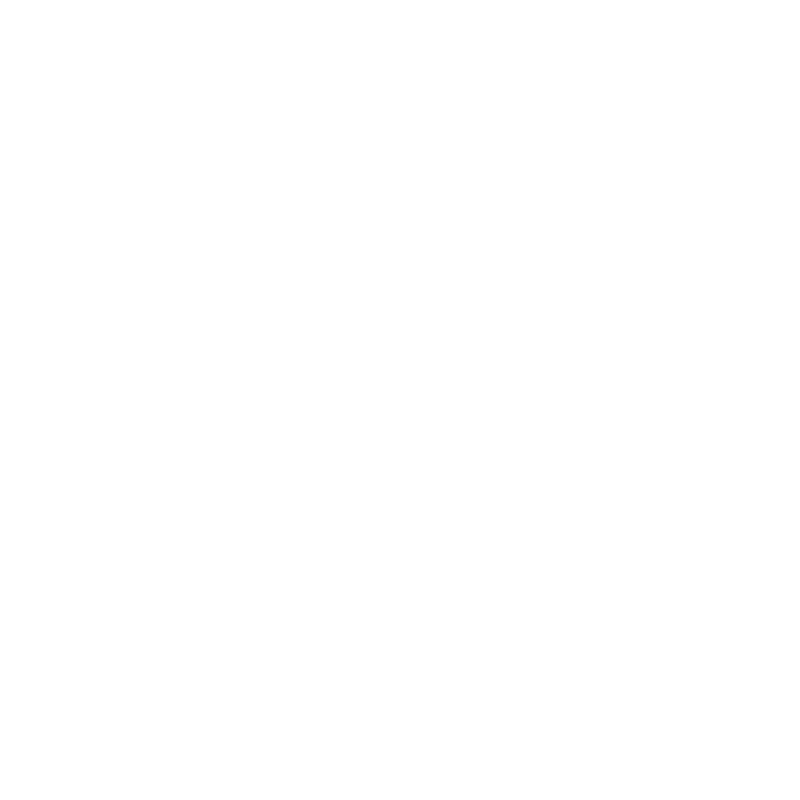

In [3]:
fig = plt.figure()
fig.set_size_inches(8.0, 8.0)
inicia()
cirr(zln.real, c = 'b')
cirx(zln.imag, c = 'r')
punto(ga.real, ga.image, c = 'k', s = 100)
plt.show()

def inicia():
    thetas = np.linspace(0,2 * np.pi, 500)
    xscir = 1.0 * np.cos(thetas)
    yscir = 1.0 * np.sin(thetas)
    ax = plt.subplot(111)
    ax.axis('equal')
    ax.axis('off')
    ax.plot(xscir, yscir, 'k') # Circulo unidad
    xlis1 = np.arange(-1, 1, 0.2) # x [-1, -0.8, -0.6, ..., 0.8]
    xlis2 = np.arange(-5, 6, dtype = int) # [-5, -4, ...,4,5]
    rlis1 = np.arange(0, 1, 0.2) # r [0, 0.2, ..., 0.8]
    rlis2 = np.arange(0, 6, dtype = int) # r [0, 1, 2, ..., 5]
    # Dibuja los circulos anteriores
    for i in xlis1:
        ax.plot(*lineax(i), 'r', lw = 0.5, ls = ':')
    for i in xlis2:
        ax.plot(*linear(i), 'r', lw = 0.5, ls = ':')
    for i in rlis1:
        ax.plot(*linear(i), 'b', lw = 0.5, ls = '--')
    for i in rlis2:
        ax.plot(*linear(i), 'b', lw = 0.5, ls = '--')

In [ ]:
def inicia():
    thetas = np.linspace(0,2 * np.pi, 500)
    xscir = 1.0 * np.cos(thetas)
    yscir = 1.0 * np.sin(thetas)
    ax = plt.subplot(111)
    ax.axis('equal')
    ax.axis('off')
    ax.plot(xscir, yscir, 'k') # Circulo unidad
    xlis1 = np.arange(-1, 1, 0.2) # x [-1, -0.8, -0.6, ..., 0.8]
    xlis2 = np.arange(-5, 6, dtype = int) # [-5, -4, ...,4,5]
    rlis1 = np.arange(0, 1, 0.2) # r [0, 0.2, ..., 0.8]
    rlis2 = np.arange(0, 6, dtype = int) # r [0, 1, 2, ..., 5]
    # Dibuja los circulos anteriores
    for i in xlis1:
        ax.plot(*lineax(i), 'r', lw = 0.5, ls = ':')
    for i in xlis2:
        ax.plot(*linear(i), 'r', lw = 0.5, ls = ':')
    for i in rlis1:
        ax.plot(*linear(i), 'b', lw = 0.5, ls = '--')
    for i in rlis2:
        ax.plot(*linear(i), 'b', lw = 0.5, ls = '--')

In [ ]:
import skrf as rf
from matplotlib import pyplot as plt # for advanced smith chart only

In [ ]:
from itertools import product

import numpy as np
import pytest
from matplotlib import pyplot as pp

from mpl_smithchart import SmithAxes

In [ ]:
@pytest.fixture
def mpl_figure(tmpdir):
    pp.figure(figsize=(6, 6))
    pp.subplot(1, 1, 1, projection='smith')
    yield
    pp.savefig(tmpdir/'out.png', format='png')

In [ ]:
def s11_of_cap(freq):
    # port1 to cap to ground
    return (1-1j*freq*1e-9)/(1+1j*freq*1e-9)

In [ ]:
def s11_of_parallel_cap_res(freq, z0=50):
    # port1 to cap||res to ground (res=50ohm) (c=1nF)
    s = 2j*np.pi*freq
    return (50 - z0*(1+s*1e-9*50))/(50 + z0*(1+s*1e-9*50))

In [ ]:
@pytest.mark.parametrize(
    "point",
    (
        200+100j,
        50.0,
        50-10j,
    ),
)
def test_plot_point(mpl_figure, point):
    pp.plot(point, datatype=SmithAxes.Z_PARAMETER)

In [ ]:
def test_plot_s_param(mpl_figure):
    freqs = np.logspace(0, 9, 200)
    s11 = s11_of_cap(freqs)
    pp.plot(s11, markevery=1, datatype=SmithAxes.S_PARAMETER)

In [ ]:
def test_plot_labels(mpl_figure):
    freqs = np.logspace(0, 9, 200)
    s11 = s11_of_cap(freqs)
    pp.plot(s11, markevery=1, datatype=SmithAxes.S_PARAMETER, label='s11')
    pp.legend()

In [ ]:
def test_plot_normalized_axes(tmpdir):
    freqs = np.logspace(0, 9, 200)
    pp.figure(figsize=(18, 12)).set_layout_engine("tight")

    for i, (do_normalize_axes, impedance) in enumerate(product([True, False], [10, 50, 200])):
        s11 = s11_of_parallel_cap_res(freqs, z0=impedance)
        pp.subplot(
            2, 3, i+1,
            projection='smith',
            axes_impedance=impedance,
            axes_normalize=do_normalize_axes,
        )
        pp.plot(s11)
        pp.title(f"Impedance: {impedance}$\\Omega$ -- Normalized Axes: {do_normalize_axes}")
    pp.savefig(tmpdir/'out.png', format='png')

In [ ]:
def test_plot_grid_styles(tmpdir):
    freqs = np.logspace(0, 9, 200)
    s11 = s11_of_parallel_cap_res(freqs)
    pp.figure(figsize=(18, 12)).set_layout_engine("tight")

    offset = 0
    for i, (major_fancy, minor_enable, minor_fancy) in enumerate(
        product(
            [True, False],
            [True, False],
            [True, False],
        ),
    ):
        if not minor_enable and minor_fancy:
            offset = offset + 1
            continue
        pp.subplot(
            2, 3, i + 1 - offset,
            projection='smith',
            grid_major_fancy=major_fancy,
            grid_minor_enable=minor_enable,
            grid_minor_fancy=minor_fancy,
        )
        major_str = "fancy" if major_fancy else "standard"
        minor_str = "off" if not minor_enable else ("fancy" if minor_fancy else "standard")

        pp.plot(s11)
        print(f"Major: {major_str} -- Minor: {minor_str}")
    pp.savefig(tmpdir/'out.png', format='png')

In [ ]:
#!/usr/bin/env python3

import sys

import numpy as np
from matplotlib import rcParams, pyplot as pp

rcParams.update({"legend.numpoints": 3})

sys.path.append("..")
from smithplot import SmithAxes

# sample data
data = np.loadtxt("data/s11.csv", delimiter=",", skiprows=1)[::100]
val1 = data[:, 1] + data[:, 2] * 1j

data = np.loadtxt("data/s22.csv", delimiter=",", skiprows=1)[::100]
val2 = data[:, 1] + data[:, 2] * 1j

# plot data
pp.figure(figsize=(6, 6))

ax = pp.subplot(1, 1, 1, projection = 'smith')
pp.plot([10, 100], markevery=1)


pp.plot(200 + 100j, datatype=SmithAxes.Z_PARAMETER)
pp.plot(50 * val1, label="default", datatype=SmithAxes.Z_PARAMETER)
pp.plot(50 * val2, markevery=1, label="interpolate=3", interpolate=3, datatype=SmithAxes.Z_PARAMETER)
pp.plot(val1, markevery=1, label="equipoints=22", equipoints=22, datatype=SmithAxes.S_PARAMETER)
pp.plot(val2, markevery=3, label="equipoints=22, \nmarkevery=3", equipoints=22, datatype=SmithAxes.S_PARAMETER)

leg = pp.legend(loc="lower right", fontsize=12)
pp.title("Matplotlib Smith Chart Projection")

pp.savefig("export.pdf", format="pdf", bbox_inches="tight")
pp.show()

In [ ]:
import matplotlib.pylab as pl 
import smithplot
from smithplot import SmithAxes

fig = pl.figure() 
ax1 = fig.add_subplot(121) 
ax1.plot([(1, 2), (3, 4)], [(4, 3), (2, 3)]) 
ax2 = fig.add_subplot(122, projection='smith') 
pl.show()

In [ ]:
import matplotlib.pylab as pl
import smithplot
from smithplot import SmithAxes

fig = pl.figure()
ax1 = fig.add_subplot(121)
ax1.plot([(1, 2), (3, 4)], [(4, 3), (2, 3)])
ax2 = fig.add_subplot(122, projection='smith')
pl.show()

## Con Scikit-rf 

![Scikit-rf](https://github.com/scikit-rf/scikit-rf/raw/master/doc/source/_static/scikit-rf-title-flat.png)

In [ ]:
import skrf as rf
from matplotlib import pyplot as plt # for advanced smith chart only

In [ ]:
from skrf import Network

ring_slot = Network('data/ring slot.s2p')
ring_slot.plot_s_smith()

In [ ]:
rf.stylely()  # nicer looking. Can be configured with different styles
ring_slot.plot_s_smith()

In [ ]:
ring_slot.plot_s_smith(draw_labels=True)

In [ ]:
ring_slot.plot_s_smith(chart_type='y')

In [ ]:
# prepare markers
lines = [
    {'marker_idx': [30, 60, 90], 'color': 'g', 'm': 0, 'n': 0, 'ntw': ring_slot},
    {'marker_idx': [15, 45, 75], 'color': 'r', 'm': 1, 'n': 0, 'ntw': ring_slot},
]

# prepare figure
fig, ax = plt.subplots(1, 1, figsize=(7,8))

# impedance smith chart
rf.plotting.smith(ax = ax, draw_labels = True, ref_imm = 50.0, chart_type = 'z')

# plot data
col_labels = ['Frequency', 'Real Imag']
row_labels = []
row_colors = []
cell_text = []
for l in lines:
    m = l['m']
    n = l['n']
    l['ntw'].plot_s_smith(m=m, n=n, ax = ax, color=l['color'])
    #plot markers
    for i, k in enumerate(l['marker_idx']):
        x = l['ntw'].s.real[k, m, n]
        y = l['ntw'].s.imag[k, m, n]
        z = l['ntw'].z[k, m, n]
        z = f'{z.real:.4f} + {z.imag:.4f}j ohm'
        f = l['ntw'].frequency.f_scaled[k]
        f_unit = l['ntw'].frequency.unit
        row_labels.append(f'M{i + 1}')
        row_colors.append(l['color'])
        ax.scatter(x, y, marker = 'v', s=20, color=l['color'])
        ax.annotate(row_labels[-1], (x, y), xytext=(-7, 7), textcoords='offset points', color=l['color'])
        cell_text.append([f'{f:.3f} {f_unit}', z])
leg1 = ax.legend(loc="upper right", fontsize= 6)

# plot the table
the_table = ax.table(cellText=cell_text,
                      colWidths=[0.4] * 2,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      rowColours=row_colors,
                      loc='bottom')
the_table.auto_set_font_size(False)
the_table.set_fontsize(6)
#the_table.scale(1.5, 1.5)

In [ ]:
# prepare figure
fig, ax = plt.subplots(1, 1, figsize=(8,8))
background = plt.imread('figures/smithchart.png')

# tweak background position
ax.imshow(background, extent=[-1.185, 1.14, -1.13, 1.155])
rf.plotting.smith(ax = ax, draw_labels = True, ref_imm = 1.0, chart_type = 'z')

ring_slot.plot_s_smith(ax = ax)

In [ ]:
ring_slot.plot_s_complex()

from matplotlib import pyplot as plt
plt.axis('equal') # otherwise circles wont be circles

In [ ]:
ring_slot.plot_s_db()

In [ ]:
from skrf.data import ring_slot_meas
ring_slot.plot_s_db(m=0,n=0, label='Theory')
ring_slot_meas.plot_s_db(m=0,n=0, label='Measurement')

In [ ]:
ring_slot.plot_s_deg()

In [ ]:
ring_slot.plot_s_deg_unwrap()

In [ ]:
gd = abs(ring_slot.s21.group_delay) *1e9 # in ns

ring_slot.plot(gd)
plt.ylabel('Group Delay (ns)')
plt.title('Group Delay of Ring Slot S21')

In [ ]:
ring_slot.plot_z_im()

In [ ]:
ring_slot.plot_y_im()

In [ ]:
ring_slot.plot_s_db(m=0,n=0, label = 'Simulation')

In [ ]:
ring_slot.frequency.unit = 'mhz'
ring_slot.plot_s_db(0,0)

In [ ]:
ring_slot.frequency.unit='ghz'
ring_slot.plot_s_db(m=0,n=0, linewidth = 3, linestyle = '--', label = 'Simulation')
ring_slot_meas.plot_s_db(m=0,n=0, marker = 'o', markevery = 10,label = 'Measured')

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

mpl_style = "seaborn-ticks"
mpl_style = mpl_style if mpl_style in style.available else "seaborn-v0_8-ticks"

with style.context(mpl_style):
    ring_slot.plot_s_smith()
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Smith Chart With Legend Room')
    plt.axis([-1.1,2.1,-1.1,1.1])
    plt.legend(loc=5)

In [ ]:
from skrf.plotting import save_all_figs
save_all_figs('data/', format=['png','eps','pdf'])

In [ ]:
from skrf import plotting
with plt.style.context('grayscale'):
    ring_slot.plot_s_deg()
    plotting.add_markers_to_lines()
    plt.legend() # have to re-generate legend

In [ ]:
# various initialization
%matplotlib widget
import skrf as rf
import matplotlib.pyplot as plt
rf.stylely()

# import the desired media and the frequency axis
from skrf.media import Coaxial
from skrf import Frequency

# frequency
f_rg58 = Frequency(1, 5, 101, 'GHz')

# media with z0_port the port impedance of the VNA
rg58 = Coaxial(f_rg58, Dint = 0.91e-3, Dout = 2.95e-3, epsilon_r = 2.3, z0_port = 50)
print(rg58)

## Con Plotly

![Plotly](https://plotly.com/python-api-reference/_static/logo.png)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattersmith(imag=[0.5, 1, 2, 3], real=[0.5, 1, 2, 3]))
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattersmith(
    imag=[1],
    real=[1],
    marker_symbol='x',
    marker_size=30,
    marker_color="green",
    subplot="smith1"
))

fig.add_trace(go.Scattersmith(
    imag=[1],
    real=[1],
    marker_symbol='x',
    marker_size=30,
    marker_color="pink",
    subplot="smith2"
))

fig.update_layout(
    smith=dict(
        realaxis_gridcolor='red',
        imaginaryaxis_gridcolor='blue',
        domain=dict(x=[0,0.45])
    ),
    smith2=dict(
        realaxis_gridcolor='blue',
        imaginaryaxis_gridcolor='red',
        domain=dict(x=[0.55,1])
    )
)

fig.update_smiths(bgcolor="lightgrey")

fig.show()

## Desde ecuaciones en Desmos

$$ \left(x-\frac{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]}{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1}\right)^{2}+y^{2}=\frac{1}{\left(\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1\right)^{2}} $$

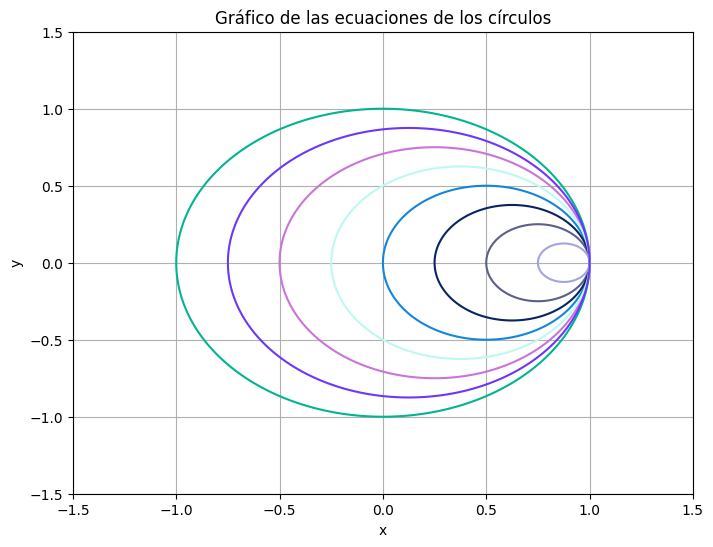

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de valores
values = [0, 1/3, 1, 3, 5/3, 7, 3/5, 1/7]

# Definir la ecuación
def circle_equation(x, y, val):
    return (x - val / (val + 1)) ** 2 + y ** 2 - 1 / (val + 1) ** 2

# Crear una cuadrícula de valores para x e y
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

# Graficar cada círculo individualmente
plt.figure(figsize=(8, 6))
for val in values:
    Z = circle_equation(X, Y, val)
    color = np.random.rand(3,)  # Genera un color aleatorio RGB
    plt.contour(X, Y, Z, levels=[0], colors=[color])  # Usa el color aleatorio
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de las ecuaciones de los círculos')
plt.grid(True)
plt.show()



## Segunda ecuación:

``` \left(x-1\right)^{2}+\left(y-\frac{1}{\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]}\right)^{2}=\frac{1}{\left(\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]\right)^{2}}\left\{x^{2}+y^{2}\le1\right\} ```

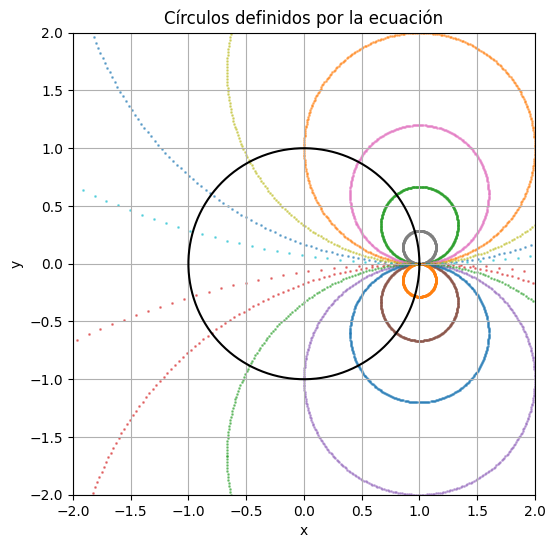

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear una cuadrícula de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.scatter(circle_x_values, circle_y_values, s=1, alpha=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


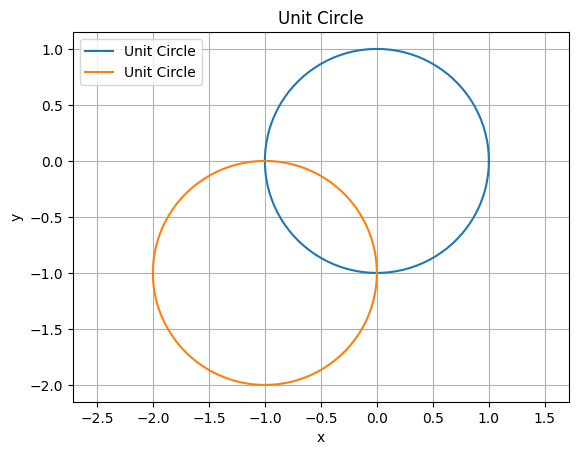

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)
x1 = np.cos(theta)-1
y1 = np.sin(theta)-1

# Create the plot
plt.plot(x, y, label="Unit Circle")
plt.plot(x1, y1, label="Unit Circle")
plt.axis("equal")  # Set equal aspect ratio
plt.title("Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()



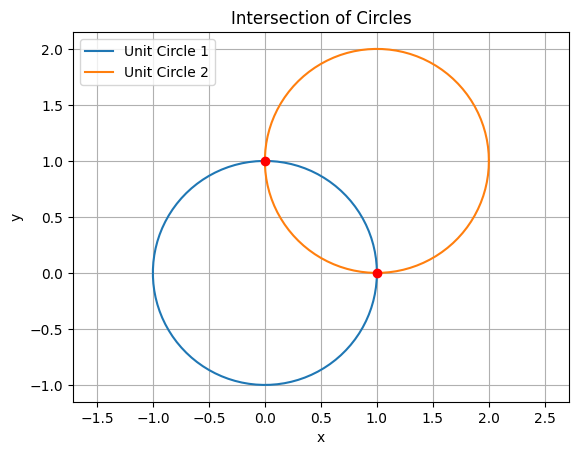

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Create the plot
plt.plot(x, y, label="Unit Circle 1")
plt.plot(x + 1, y + 1, label="Unit Circle 2")
if intersection_points:
    for point in intersection_points:
        plt.plot(point[0], point[1], 'ro')  # Plot intersection points
plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


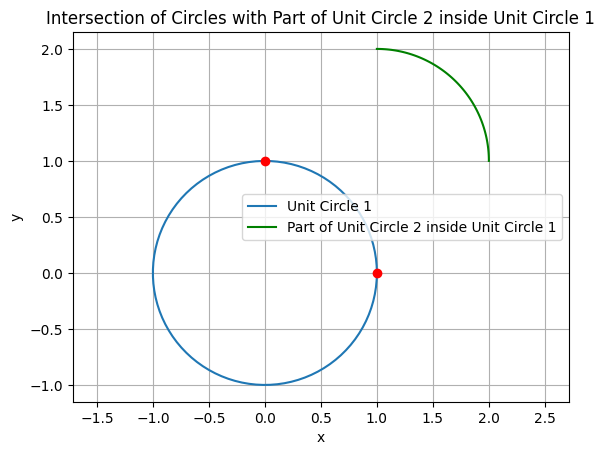

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Plot the first circle
plt.plot(x, y, label="Unit Circle 1")

# Plot the second circle
if intersection_points:
    for point in intersection_points:
        plt.plot(point[0], point[1], 'ro')  # Plot intersection points
    # Plot the part of the second circle inside the first circle
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x2 = circle2[0] + circle2[2] * np.cos(alpha)
    y2 = circle2[1] + circle2[2] * np.sin(alpha)
    plt.plot(x2, y2, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle 2 inside Unit Circle 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


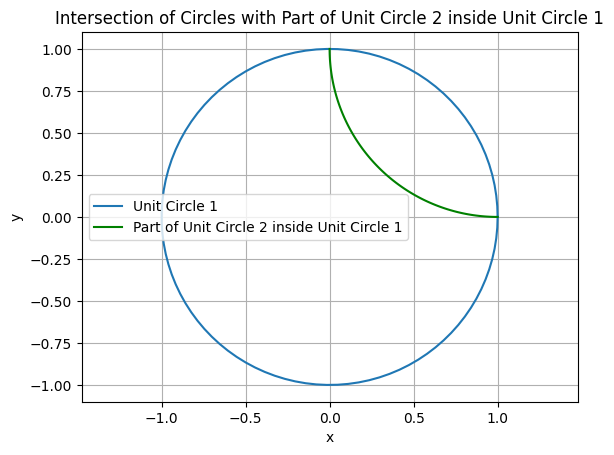

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Plot the first circle
plt.plot(x, y, label="Unit Circle 1")

# Plot the second circle
#plt.plot(x + circle2[0], y + circle2[1], label="Unit Circle 2")

# Plot the part of the second circle inside the first circle
if intersection_points:
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x2_inside = circle2[0] + circle2[2] * np.cos(alpha + np.pi/2)  # Sumamos en cos
    y2_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)  # Restamos en sin
    plt.plot(x2_inside, y2_inside, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle 2 inside Unit Circle 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()




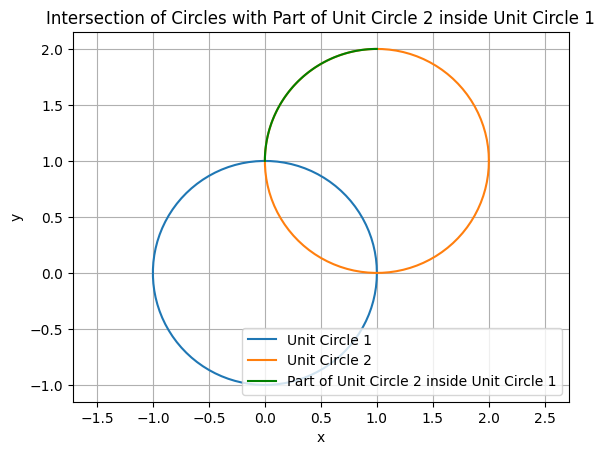

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Plot the first circle
plt.plot(x, y, label="Unit Circle 1")

# Plot the second circle
plt.plot(x + circle2[0], y + circle2[1], label="Unit Circle 2")

# Plot the part of the second circle inside the first circle
if intersection_points:
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x2_inside = circle2[0] + circle2[2] * np.cos(alpha + np.pi/2)  # Rotación de -90 grados
    y2_inside = circle2[1] + circle2[2] * np.sin(alpha + np.pi/2)  # Rotación de -90 grados
    plt.plot(x2_inside, y2_inside, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle 2 inside Unit Circle 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


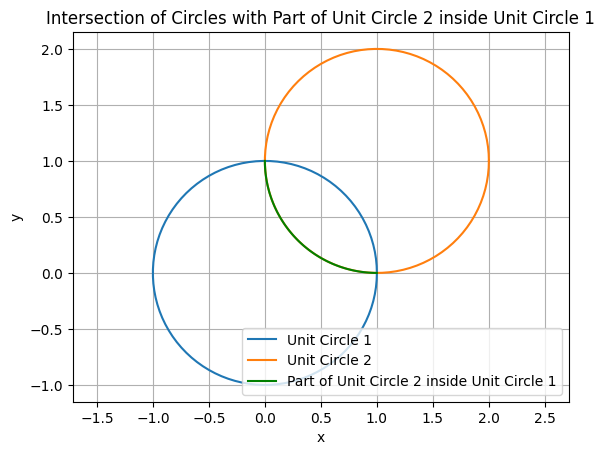

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Plot the first circle
plt.plot(x, y, label="Unit Circle 1")

# Plot the second circle
plt.plot(x + circle2[0], y + circle2[1], label="Unit Circle 2")

# Plot the part of the second circle inside the first circle
if intersection_points:
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x2_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)  # Rotación de -90 grados
    y2_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)  # Rotación de -90 grados
    plt.plot(x2_inside, y2_inside, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle 2 inside Unit Circle 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


UnboundLocalError: cannot access local variable 'h' where it is not associated with a value

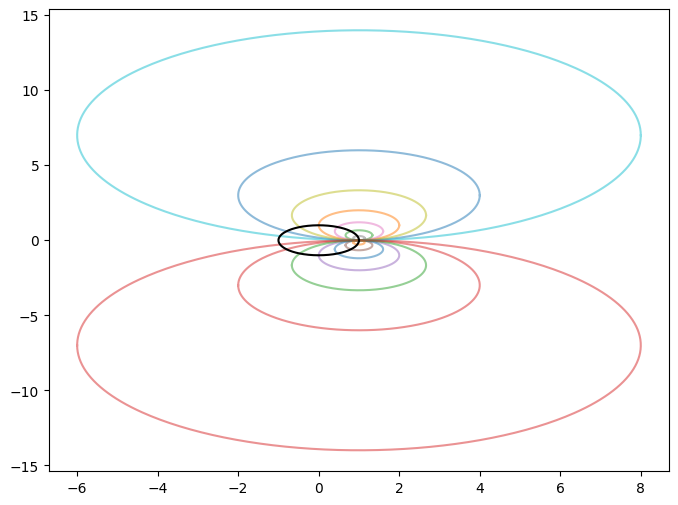

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    # Calcular la intersección solo si las circunferencias se intersectan
    if d >= np.abs(r1 - r2):
        # Cálculo de intersecciones
        a = (r1**2 - r2**2 + d**2) / (2 * d)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d
        h_squared = r1**2 - a**2
        if h_squared >= 0:
            h = np.sqrt(h_squared)

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear una cuadrícula de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, alpha=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            plt.plot([intersection_points[0][0], intersection_points[1][0]], 
                     [intersection_points[0][1], intersection_points[1][1]], 
                     color='red')
            
# Establecer los límites y etiquetas
plt.xlim(-10, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


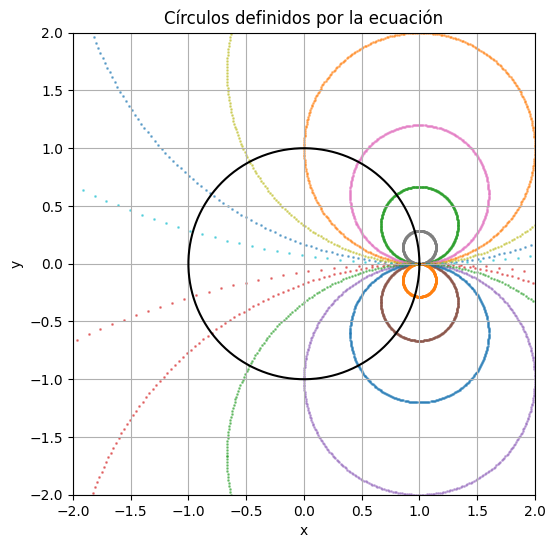

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Definir el rango de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.scatter(circle_x_values, circle_y_values, s=1, alpha=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            plt.plot([intersection_points[0][0], intersection_points[1][0]], 
                     [intersection_points[0][1], intersection_points[1][1]], 
                     color='red')

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


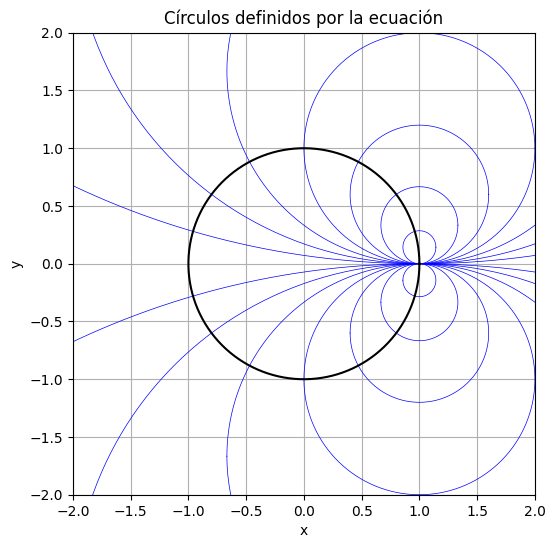

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Definir el rango de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.plot([intersect1[0], intersect2[0]], 
                     [intersect1[1], intersect2[1]], 
                     color='red', linewidth=1)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0000000064523922, 5.551115123125783e-17) (0.9999999935476079, 5.551115123125783e-17)
Intersections: (1.0000000210734243, 6.661338147750939e-16) (0.9999999789265758, 6.661338147750939e-16)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0000000129047841, 1.1102230246251565e-16) (0.9999999870952159, 1.1102230246251565e-16)
Intersections: (1.0000000258095683, 5.551115123125783e-16) (0.9999999741904317, 5.551115123125783e-16)
Intersections: (1.0, 0.0) (1.0, 0.0)
Intersections: (1.0, 0.0) (1.0,

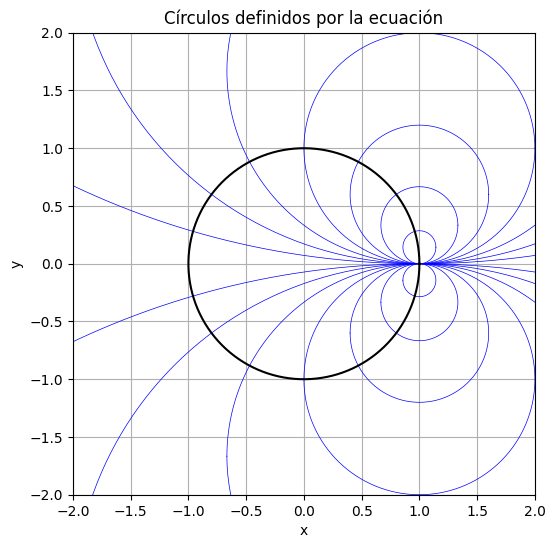

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Definir el rango de valores para x e y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            print("Intersections:", intersect1, intersect2)  # Imprimir intersecciones
            plt.plot([intersect1[0], intersect2[0]], 
                     [intersect1[1], intersect2[1]], 
                     color='red', linewidth=1)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


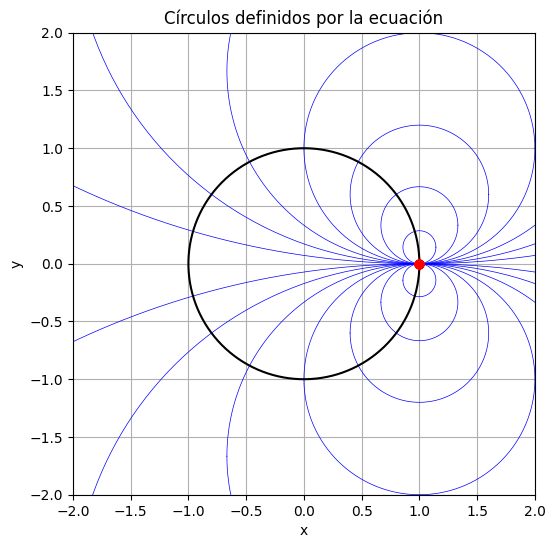

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.scatter([intersect1[0], intersect2[0]], 
                        [intersect1[1], intersect2[1]], 
                        color='red', zorder=3)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


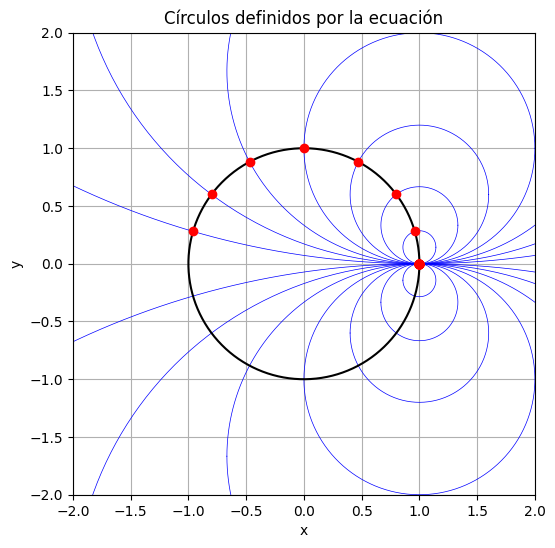

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.scatter([intersect1[0], intersect2[0]], 
                        [intersect1[1], intersect2[1]], 
                        color='red', zorder=3)

# Encontrar intersecciones del círculo unitario con los otros círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


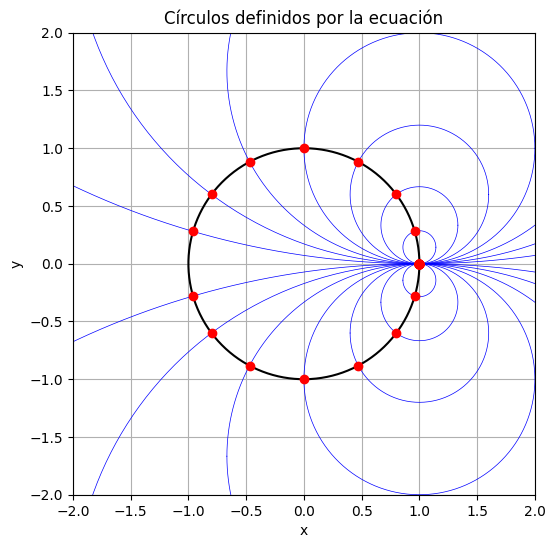

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.scatter([intersect1[0], intersect2[0]], 
                        [intersect1[1], intersect2[1]], 
                        color='red', zorder=3)

# Encontrar intersecciones del círculo unitario con los otros círculos (positivas)
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)

# Encontrar intersecciones del círculo unitario con los otros círculos (negativas)
for val in values:
    circle_x = 1
    circle_y = -1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


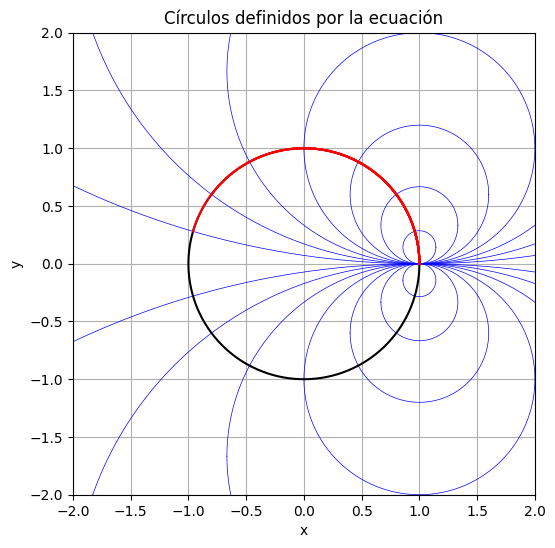

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones del círculo unitario con los otros círculos (positivas)
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        # Calcular los ángulos de las intersecciones
        angle1 = np.angle(complex(intersect1[0], intersect1[1]))
        angle2 = np.angle(complex(intersect2[0], intersect2[1]))
        # Graficar el arco entre las intersecciones dentro del círculo unitario
        if angle1 < angle2:
            angles = np.linspace(angle1, angle2, 100)
        else:
            angles = np.linspace(angle1, angle2 + 2*np.pi, 100)
        x_arc = np.cos(angles)
        y_arc = np.sin(angles)
        plt.plot(x_arc, y_arc, color='red')

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')



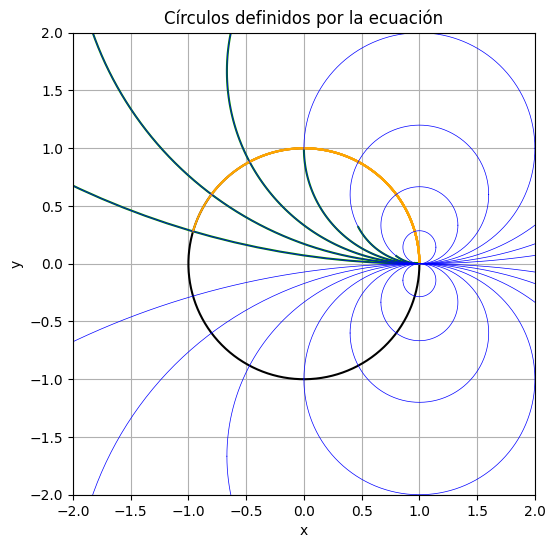

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones del círculo unitario con los otros círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                            np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
        x2_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)  # Rotación de -90 grados
        y2_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)  # Rotación de -90 grados
        plt.plot(x2_inside, y2_inside, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')
        intersect1, intersect2 = intersection_points

        # Calcular el ángulo de la intersección con respecto al origen
        angle_intersect1 = np.arctan2(intersect1[1], intersect1[0])
        angle_intersect2 = np.arctan2(intersect2[1], intersect2[0])

        # Trazar la parte del círculo dentro del círculo unitario
        if angle_intersect1 < angle_intersect2:
            angles_inside = np.linspace(angle_intersect1, angle_intersect2, 100)
        else:
            angles_inside = np.linspace(angle_intersect1, angle_intersect2 + 2*np.pi, 100)
        x_inside = np.cos(angles_inside)
        y_inside = np.sin(angles_inside)
        plt.plot(x_inside, y_inside, color='orange')

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


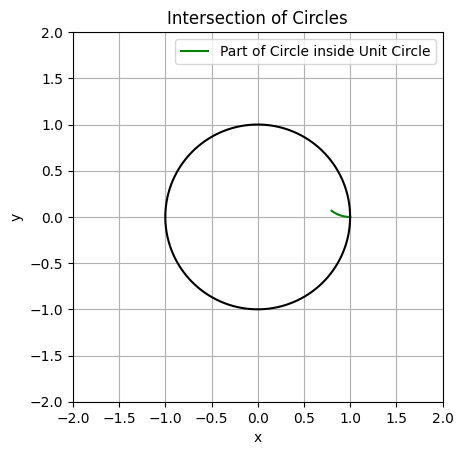

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Definimos solo el cuarto círculo
circle_x = 1
circle_y = 1 / 3
circle_radius = 1 / 3

# Encontramos las intersecciones con el círculo unitario
circle1 = (0, 0, 1)
circle2 = (circle_x, circle_y, circle_radius)
intersection_points = circle_intersection(circle1, circle2)

# Si hay intersecciones, graficamos la parte del círculo dentro del círculo unitario
if intersection_points:
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x_inside = circle_x + circle_radius * np.cos(alpha + np.pi/2)  # Rotación de -90 grados
    y_inside = circle_y + circle_radius * np.sin(alpha - np.pi/2)  # Rotación de -90 grados
    plt.plot(x_inside, y_inside, label="Part of Circle inside Unit Circle", color='green')

# Graficamos el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Establecemos los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersection of Circles')

# Mostramos la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostramos la gráfica
plt.legend()
plt.show()


Intersección entre círculos 1 y 2: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 3: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 9: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 10: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 3: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 9: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 10: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 9: (1.0000000064523922, 5.551115123125783e-17), (0.9999999935476079, 5.551115123125783e-17)
Intersección entre círculos 3 y 10: (1.0000000210734243, 6.661338147750939e-16), (0.9999999789265758, 6.661338147750939e

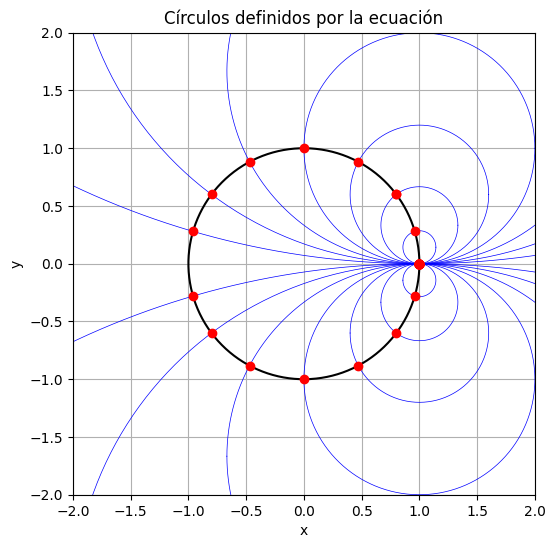

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.scatter([intersect1[0], intersect2[0]], 
                        [intersect1[1], intersect2[1]], 
                        color='red', zorder=3)
            print(f"Intersección entre círculos {i+1} y {j+1}: {intersect1}, {intersect2}")

# Encontrar intersecciones del círculo unitario con los otros círculos (positivas)
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)
        print(f"Intersección entre círculo unitario y círculo {circle_x, circle_y, circle_radius}: {intersect1}, {intersect2}")

# Encontrar intersecciones del círculo unitario con los otros círculos (negativas)
for val in values:
    circle_x = 1
    circle_y = -1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)
        print(f"Intersección entre círculo unitario y círculo {circle_x, circle_y, circle_radius}: {intersect1}, {intersect2}")

# Encontrar intersecciones del cuarto círculo con el círculo unitario
circle1 = (1, 1 / 3, 1 / 3)  # Definimos el cuarto círculo
circle2 = (0, 0, 1)  # Círculo unitario
intersection_points = circle_intersection(circle1, circle2)
if intersection_points:
    intersect1, intersect2 = intersection_points
    plt.scatter([intersect1[0], intersect2[0]], 
                [intersect1[1], intersect2[1]], 
                color='red', zorder=3)
    print(f"Intersección entre círculo 4 y círculo unitario: {intersect1}, {intersect2}")

# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


Intersección entre círculos 1 y 2: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 3: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 9: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 1 y 10: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 3: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 9: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 2 y 10: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 7: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 8: (1.0, 0.0), (1.0, 0.0)
Intersección entre círculos 3 y 9: (1.0000000064523922, 5.551115123125783e-17), (0.9999999935476079, 5.551115123125783e-17)
Intersección entre círculos 3 y 10: (1.0000000210734243, 6.661338147750939e-16), (0.9999999789265758, 6.661338147750939e

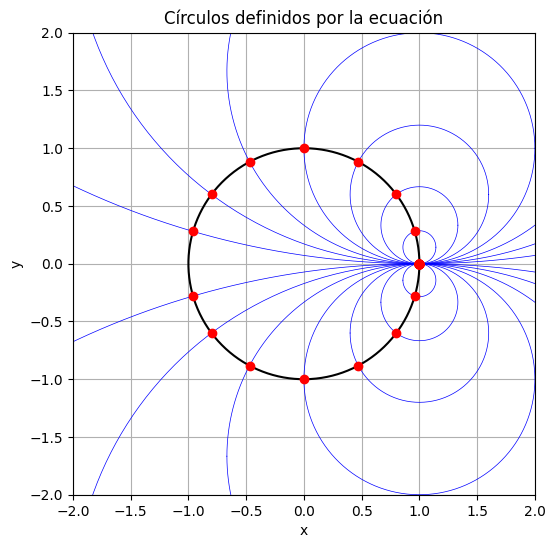

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2) or (d < np.abs(r1 - r2)):
        return None  # No intersection
    if (d == 0) and (r1 == r2):
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h_squared = r1**2 - a**2
    if h_squared >= 0:
        h = np.sqrt(h_squared)
        x3 = x1 + a * (x2 - x1) / d
        y3 = y1 + a * (y2 - y1) / d

        # Calculate intersection points
        intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
        intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

        return intersect1, intersect2
    else:
        return None  # No intersection

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los círculos
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    theta = np.linspace(0, 2 * np.pi, 400)
    circle_x_values = circle_x + circle_radius * np.cos(theta)
    circle_y_values = circle_y + circle_radius * np.sin(theta)
    plt.plot(circle_x_values, circle_y_values, 'b-', linewidth=0.5)

# Graficar el círculo unitario
theta = np.linspace(0, 2 * np.pi, 400)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
plt.plot(unit_circle_x, unit_circle_y, color='black')

# Encontrar intersecciones y graficarlas
for i in range(len(values)):
    for j in range(i + 1, len(values)):
        circle1 = (1, 1 / values[i], 1 / values[i])
        circle2 = (1, 1 / values[j], 1 / values[j])
        intersection_points = circle_intersection(circle1, circle2)
        if intersection_points:
            intersect1, intersect2 = intersection_points
            plt.scatter([intersect1[0], intersect2[0]], 
                        [intersect1[1], intersect2[1]], 
                        color='red', zorder=3)
            print(f"Intersección entre círculos {i+1} y {j+1}: {intersect1}, {intersect2}")

# Encontrar intersecciones del círculo unitario con los otros círculos (positivas)
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)
        print(f"Intersección entre círculo unitario y círculo {circle_x, circle_y, circle_radius}: {intersect1}, {intersect2}")

# Encontrar intersecciones del círculo unitario con los otros círculos (negativas)
for val in values:
    circle_x = 1
    circle_y = -1 / val
    circle_radius = 1 / val
    circle1 = (0, 0, 1)
    circle2 = (circle_x, circle_y, circle_radius)
    intersection_points = circle_intersection(circle1, circle2)
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], 
                    [intersect1[1], intersect2[1]], 
                    color='red', zorder=3)
        print(f"Intersección entre círculo unitario y círculo {circle_x, circle_y, circle_radius}: {intersect1}, {intersect2}")


# Establecer los límites y etiquetas
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Círculos definidos por la ecuación')

# Mostrar la cuadrícula y aspecto igual
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()


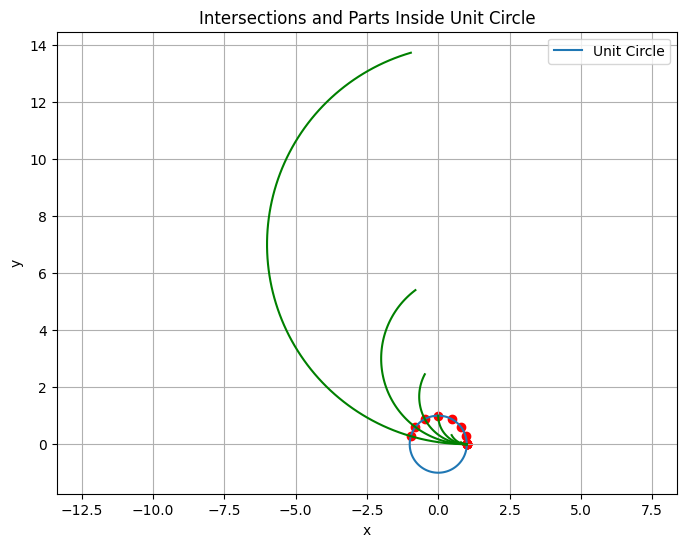

In [87]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
plt.plot(x, y, label="Unit Circle")

# Encontrar intersecciones y partes dentro del círculo unitario
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)

    # Encontrar intersecciones
    intersection_points = circle_intersection(circle1, circle2)

    # Graficar las intersecciones
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], [intersect1[1], intersect2[1]], color='red')

    # Graficar la parte del círculo dentro del círculo unitario
    if intersection_points:
        alpha = np.linspace(np.arctan2(intersect1[1], intersect1[0]), np.arctan2(intersect2[1], intersect2[0]), 100)
        x_inside = circle2[0] + circle2[1] * np.cos(alpha+np.pi/2)
        y_inside = circle2[1] + circle2[2] * np.sin(alpha-np.pi/2)
        plt.plot(x_inside, y_inside, color='green')

plt.axis("equal")  # Establecer proporción de aspecto igual
plt.title("Intersections and Parts Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


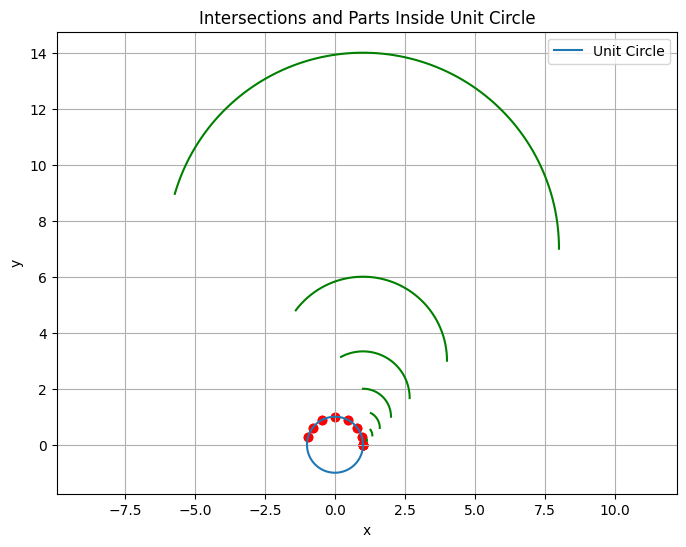

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
plt.plot(x, y, label="Unit Circle")

# Encontrar intersecciones y partes dentro del círculo unitario
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)

    # Encontrar intersecciones
    intersection_points = circle_intersection(circle1, circle2)

    # Graficar las intersecciones
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], [intersect1[1], intersect2[1]], color='red')

    # Graficar la parte del círculo dentro del círculo unitario
    if intersection_points:
        alpha = np.linspace(np.arctan2(intersect1[1], intersect1[0]), np.arctan2(intersect2[1], intersect2[0]), 100)
        x_inside = circle2[0] + circle2[1] * np.cos(alpha)
        y_inside = circle2[1] + circle2[2] * np.sin(alpha)
        plt.plot(x_inside, y_inside, color='green')
        plt.scatter([intersect2[0]], [intersect2[1]], color='red')  # Marcar la intersección con el círculo unitario

plt.axis("equal")  # Establecer proporción de aspecto igual
plt.title("Intersections and Parts Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


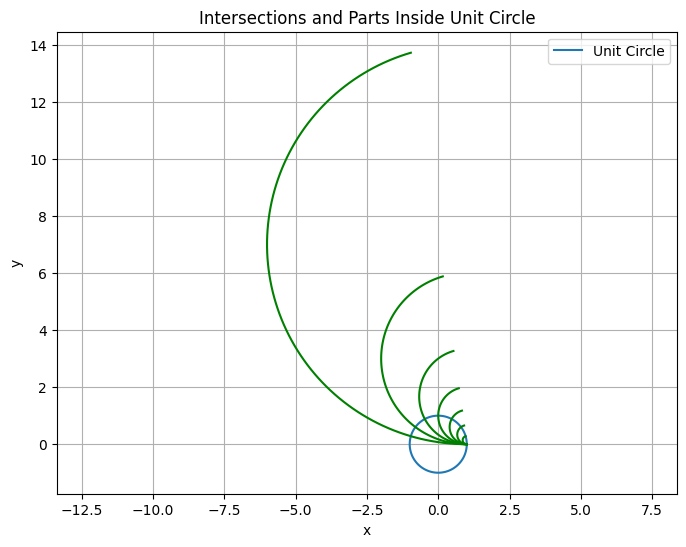

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
plt.plot(x, y, label="Unit Circle")

# Encontrar intersecciones y partes dentro del círculo unitario
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)

    # Encontrar intersecciones
    intersection_points = circle_intersection(circle1, circle2)

    # Graficar las intersecciones
    if intersection_points:
        # Calcular el ángulo inicial y final
        start_angle = np.arctan2(intersect1[1], intersect1[0])
        end_angle = np.arctan2(intersect2[1], intersect2[0])

        # Asegurarse de que el ángulo final sea mayor que el ángulo inicial
        if start_angle > end_angle:
            start_angle, end_angle = end_angle, start_angle
    
        # Generar una secuencia de ángulos entre el ángulo inicial y final
        alpha = np.linspace(start_angle, end_angle, 100)
    
        # Calcular las coordenadas x e y de los puntos interiores del círculo 2
        x_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)
        y_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)
    
        plt.plot(x_inside, y_inside, color='green')


plt.axis("equal")  # Establecer proporción de aspecto igual
plt.title("Intersections and Parts Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


Lista de ángulos finales en radianes: [0.         0.6435029  1.08088241 1.57079633 2.06071025 2.49808976
 2.85780212]


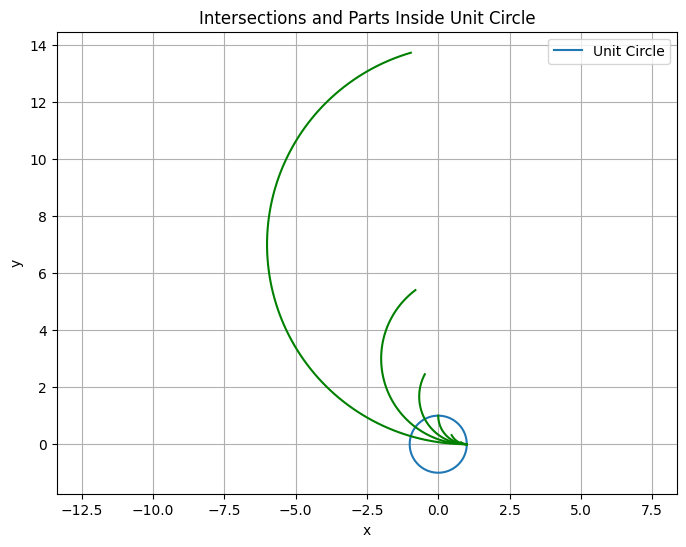

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])
# Lista de valores para end_angle en grados
end_angle_degrees = [0, 36.87, 61.93, 90, 118.07, 143.13, 163.74]

# Convertir ángulos de grados a radianes
end_angle_radians = np.deg2rad(end_angle_degrees)

print("Lista de ángulos finales en radianes:", end_angle_radians)
# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
plt.plot(x, y, label="Unit Circle")

# Encontrar intersecciones y partes dentro del círculo unitario
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)

    # Encontrar intersecciones
    intersection_points = circle_intersection(circle1, circle2)

    # Graficar las intersecciones
    if intersection_points:
        intersect1, intersect2 = intersection_points

        # Calcular el ángulo inicial y final
        start_angle = np.arctan2(intersect1[1], intersect1[0])
        end_angle = np.arctan2(intersect2[1], intersect2[0])

        # Asegurarse de que el ángulo final sea mayor que el ángulo inicial
        if start_angle > end_angle:
            start_angle, end_angle = end_angle, start_angle
    
        # Generar una secuencia de ángulos entre el ángulo inicial y final
        alpha = np.linspace(start_angle, end_angle, 100)
    
        # Calcular las coordenadas x e y de los puntos interiores del círculo 2
        x_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)
        y_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)
    
        plt.plot(x_inside, y_inside, color='green')


plt.axis("equal")  # Establecer proporción de aspecto igual
plt.title("Intersections and Parts Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


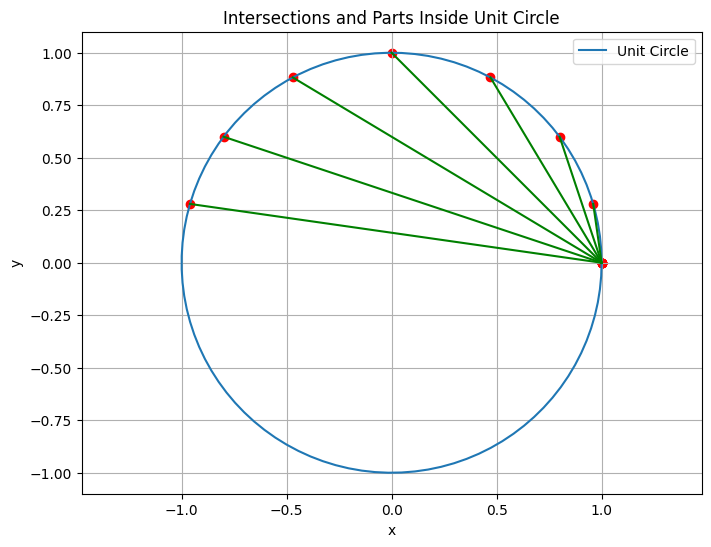

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to find intersection points between two circles
def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if d > r1 + r2 or d < np.abs(r1 - r2):
        return None  # No intersection
    if d == 0 and r1 == r2:
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Lista de valores
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el círculo unitario
plt.plot(x, y, label="Unit Circle")

# Encontrar intersecciones y partes dentro del círculo unitario
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)

    # Encontrar intersecciones
    intersection_points = circle_intersection(circle1, circle2)

    # Graficar las intersecciones y conectarlas
    if intersection_points:
        intersect1, intersect2 = intersection_points
        plt.scatter([intersect1[0], intersect2[0]], [intersect1[1], intersect2[1]], color='red')
        plt.plot([intersect1[0], intersect2[0]], [intersect1[1], intersect2[1]], color='green')

plt.axis("equal")  # Establecer proporción de aspecto igual
plt.title("Intersections and Parts Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


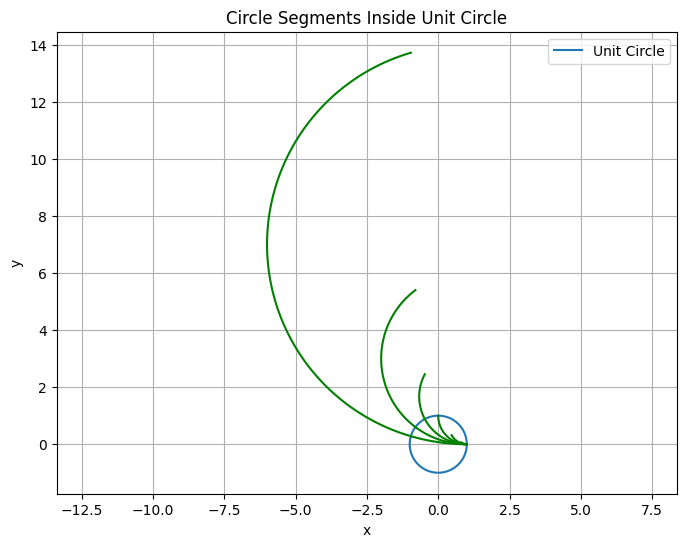

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Function to find intersection points between a circle and the unit circle
def circle_intersection(circle):
    x, y, r = circle
    # Calculate distance between circle center and origin
    d = np.sqrt(x**2 + y**2)
    # Check if circles are coincident or one is contained in the other
    if d > 1 + r or d < np.abs(1 - r):
        return None  # No intersection
    if d == 1 and r == 1:
        return [(1, 0)]  # Circles are coincident
    # Calculate angle of intersection points
    theta = np.arccos((x**2 + y**2 + 1 - r**2) / (2 * d))
    # Calculate intersection points
    intersect1 = (x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta))
    intersect2 = (x * np.cos(-theta) - y * np.sin(-theta), x * np.sin(-theta) + y * np.cos(-theta))
    return [intersect1, intersect2]

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# Define circle parameters
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the unit circle
plt.plot(unit_circle_x, unit_circle_y, label="Unit Circle")

# Plot circle segments inside the unit circle
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle = (circle_x, circle_y, circle_radius)
    
    # Find intersection points with the unit circle
    intersection_points = circle_intersection(circle)
    
    if intersection_points:
        # Sort intersection points by angle
        intersection_points.sort(key=lambda p: np.arctan2(p[1], p[0]))
        
        # Calculate angle range for the circle segment inside the unit circle
        start_angle = np.arctan2(intersection_points[0][1], intersection_points[0][0])
        end_angle = np.arctan2(intersection_points[1][1], intersection_points[1][0])
        
        # Generate theta values for the circle segment
        alpha = np.linspace(start_angle, end_angle, 100)
        
        # Calculate x and y coordinates for the circle segment, clipping to unit circle boundary
        circle_segment_x = (circle_x + circle_radius * np.cos(alpha+np.pi/2))
        circle_segment_y = (circle_y + circle_radius * np.sin(alpha-np.pi/2))
        
        plt.plot(circle_segment_x, circle_segment_y, color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Circle Segments Inside Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


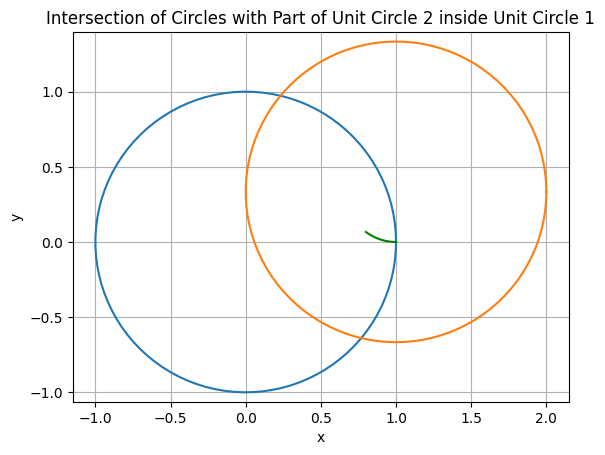

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Plot the first circle
plt.plot(x, y, label="Unit Circle 1")

# Plot the second circle
plt.plot(x + circle2[0], y + circle2[1], label="Unit Circle 2")

# Plot the part of the second circle inside the first circle
if intersection_points:
    alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                        np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
    x2_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)  # Rotación de -90 grados
    y2_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)  # Rotación de -90 grados
    plt.plot(x2_inside, y2_inside, label="Part of Unit Circle 2 inside Unit Circle 1", color='green')

plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle 2 inside Unit Circle 1")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

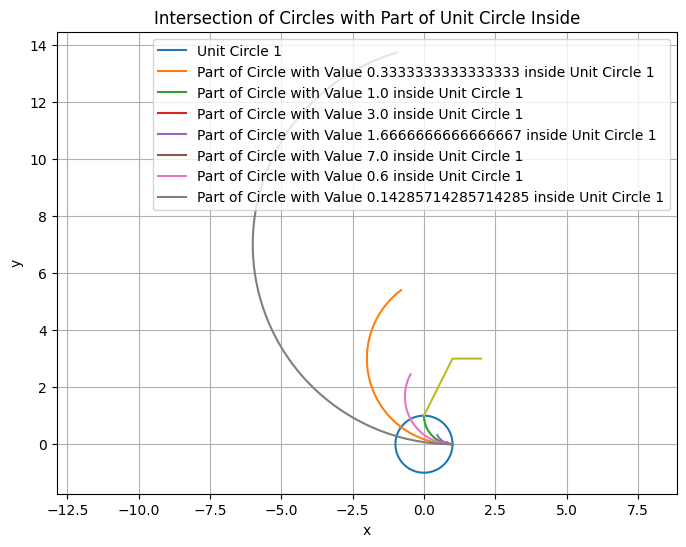

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)

# Values for new circles
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the unit circle
plt.plot(x, y, label="Unit Circle 1")

# Plot circles based on the provided values
for val in values:
    circle_x = 1
    circle_y = 1 / val
    circle_radius = 1 / val
    circle2 = (circle_x, circle_y, circle_radius)
    
    # Find intersection points
    intersection_points = circle_intersection(circle1, circle2)
    
    # Plot the part of the circle inside the unit circle
    if intersection_points:
        alpha = np.linspace(np.arctan2(intersection_points[0][1], intersection_points[0][0]), 
                            np.arctan2(intersection_points[1][1], intersection_points[1][0]), 100)
        x2_inside = circle2[0] + circle2[1] * np.cos(alpha + np.pi/2)  # Rotate by -90 degrees
        y2_inside = circle2[1] + circle2[2] * np.sin(alpha - np.pi/2)  # Rotate by -90 degrees
        plt.plot(x2_inside, y2_inside, label=f"Part of Circle with Value {val} inside Unit Circle 1")
circle3 = (1, 1/(1/3),1/(1/3))
plt.plot(circle3)
plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles with Part of Unit Circle Inside")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


In [55]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    div_array = np.array([0, 1/3, 1, 3, 5/3, 7, 3/5, 1/7])
    divisor = div_array + 1
    numerator = 1 / divisor
    diff_squared = (x - div_array / divisor) ** 2
    return np.sqrt(1 / numerator ** 2 - diff_squared)

def f2(y):
    div_array = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])
    divisor = div_array
    numerator = 1 / divisor
    diff_squared = (y - 1 / div_array) ** 2
    return np.sqrt(1 / numerator ** 2 - diff_squared)

def f3(x):
    return np.zeros_like(x)

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Graficar las funciones
plt.figure(figsize=(8, 6))
plt.plot(x, f1(x), label='Equation 1')
plt.plot(f2(y), y, label='Equation 2')
plt.plot(x, f3(x), label='Equation 3')

plt.fill_between(x, f1(x), where=(x>=-1) & (x<=1), alpha=0.3)
plt.fill_betweenx(y, f2(y), where=(y>=-1) & (y<=1), alpha=0.3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of Equations')
plt.grid(True)
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (100,) (8,) 

<Figure size 800x600 with 0 Axes>

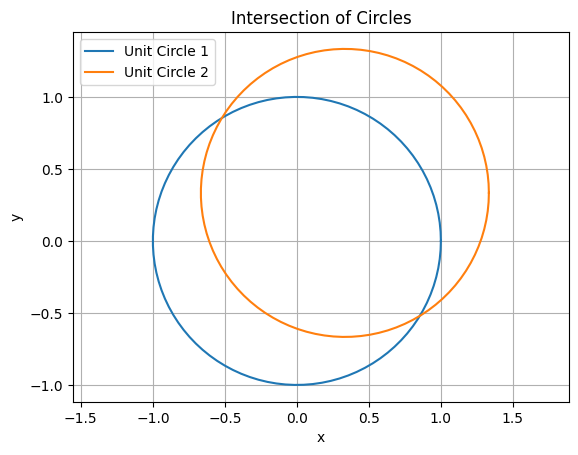

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def circle_intersection(circle1, circle2):
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2

    # Calculate distance between circle centers
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Check if circles are coincident or one is contained in the other
    if (d > r1 + r2).any() or (d < np.abs(r1 - r2)).any():
        return None  # No intersection
    if (d == 0).any() and (r1 == r2).any():
        return "Coincident, infinite intersection points"

    # Calculate intersection points
    a = (r1**2 - r2**2 + d**2) / (2 * d)
    h = np.sqrt(r1**2 - a**2)
    x3 = x1 + a * (x2 - x1) / d
    y3 = y1 + a * (y2 - y1) / d

    # Calculate intersection points
    intersect1 = (x3 + h * (y2 - y1) / d, y3 - h * (x2 - x1) / d)
    intersect2 = (x3 - h * (y2 - y1) / d, y3 + h * (x2 - x1) / d)

    return intersect1, intersect2

# Generate theta values from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Compute x and y coordinates for the unit circle
x = np.cos(theta)
y = np.sin(theta)

# Define circle parameters
circle1 = (0, 0, 1)
circle2 = (1, 1, 1/3)

# Find intersection points
intersection_points = circle_intersection(circle1, circle2)

# Create the plot
plt.plot(x, y, label="Unit Circle 1")
plt.plot(x + 1/3, y + 1/3, label="Unit Circle 2")
if intersection_points:
    for point in intersection_points:
        plt.plot(point[0], point[1], 'ro')  # Plot intersection points
plt.axis("equal")  # Set equal aspect ratio
plt.title("Intersection of Circles")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

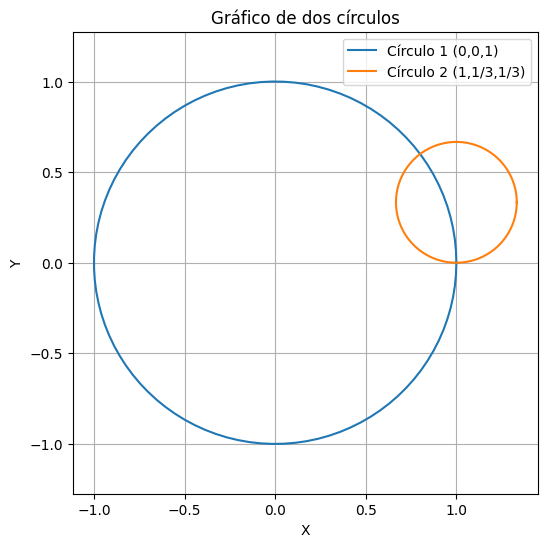

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los dos círculos
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()



Para calcular la intersección entre los dos círculos, podemos resolver el sistema de ecuaciones formado por las ecuaciones de ambos círculos y encontrar los puntos donde se cruzan.

El primer círculo está centrado en el origen y tiene un radio de 1, lo que significa que su ecuación es $$𝑥^2+𝑦^2=1$$.

El segundo círculo tiene su centro en $$\left (1, \frac{1}{3}\right )$$ y un radio de $$\left (\frac{1}{3} \right )$$, por lo que su ecuación es 
$$(𝑥−1)^2+ \left (𝑦−\frac{1}{3}\right )^2=\left( \frac{1}{3} \right)^2$$.

Podemos resolver este sistema de ecuaciones para encontrar los puntos de intersección. Aquí está el código para hacerlo:

In [6]:
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Imprimir los puntos de intersección
print("Puntos de intersección:")
for intersection in intersections:
    print(intersection)


Puntos de intersección:
(0.800000000000000, 0.600000000000000)
(1.00000000000000, 0.0)


Puntos de intersección:
(0.8, 0.6)
(1.0, 0.0)


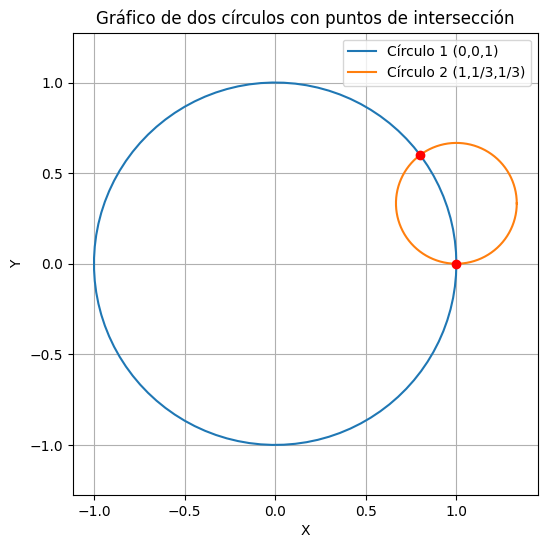

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección
intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección
print("Puntos de intersección:")
for intersection in intersection_points:
    print(intersection)

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los círculos y los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
for point in intersection_points:
    plt.plot(point[0], point[1], 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección:
(0.8, 0.6)
(1.0, 0.0)


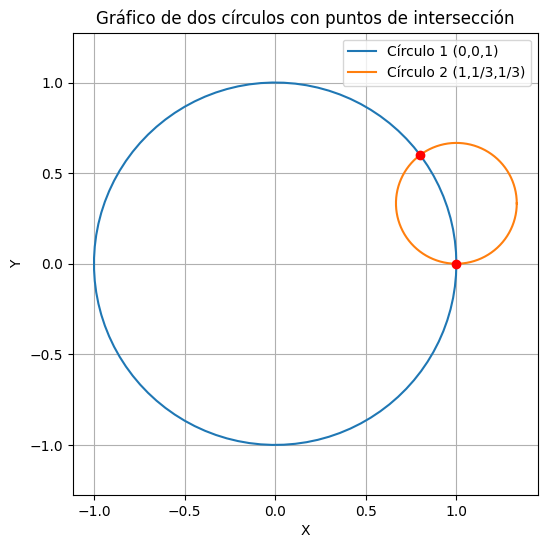

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección
intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección
print("Puntos de intersección:")
for intersection in intersection_points:
    print(intersection)

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los círculos y los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
for point in intersection_points:
    plt.plot(point[0], point[1], 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección como complejos:
(0.8+0j) (0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
((0.8+0j), (0.6+0j))
((1+0j), 0j)


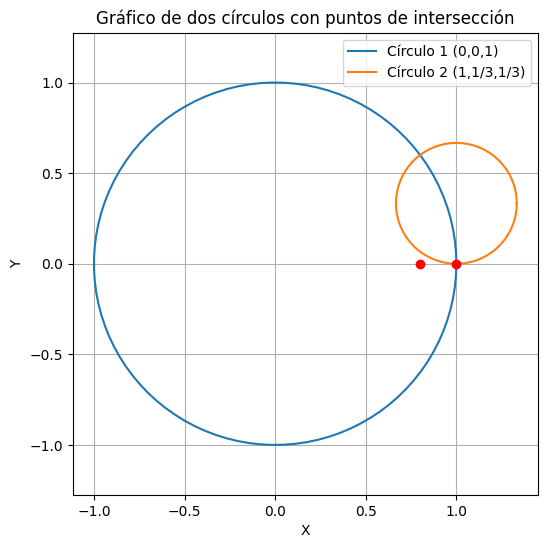

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números complejos)
intersection_points = [(complex(intersection[0]), complex(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersection_points:
    print(intersection)

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los círculos y los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
for point in intersection_points:
    plt.plot(point[0].real, point[0].imag, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección como complejos:
(0.8+0j) (0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.8 0.6
1.0 0.0


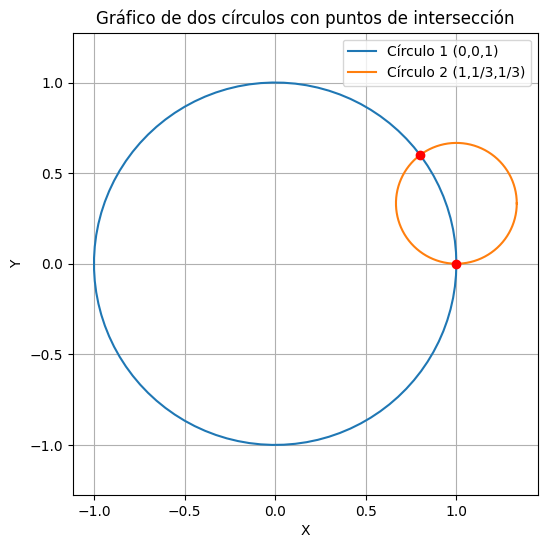

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Extraer coordenadas de los puntos de intersección (como números complejos)
intersection_points_complex = [(complex(intersection[0]), complex(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los círculos y los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
for point in intersection_points_real:
    plt.plot(point[0].real, point[1].real, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección como complejos:
(0.8+0j) (0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.8 0.6
1.0 0.0


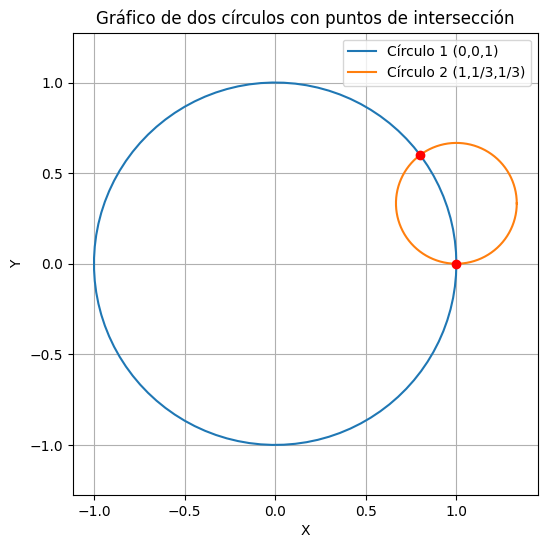

In [27]:

import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Graficar los círculos y los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
for point in intersection_points_real:
    plt.plot(point[0], point[1], 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección como complejos:
(0.8+0j) (0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.8 0.6
1.0 0.0


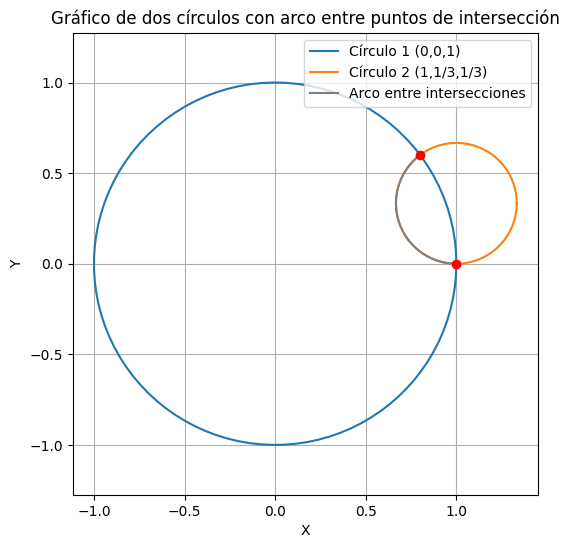

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1/3)**2 - (1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/3 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/3,1/3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


# Define circle parameters
``values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])``


Puntos de intersección como complejos:
0j (1+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.0 1.0
1.0 0.0


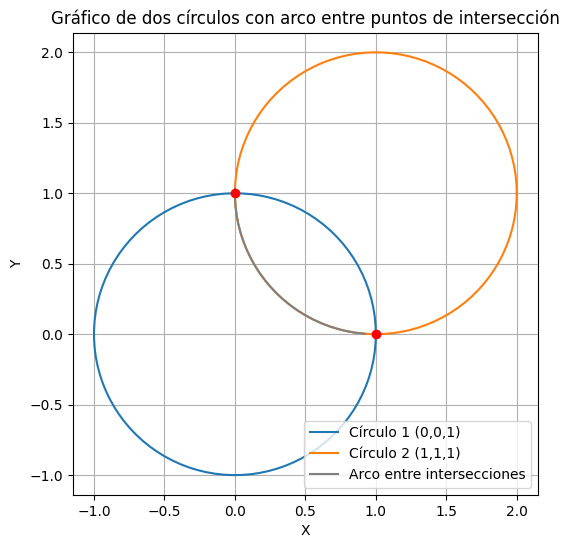

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1)**2 - (1)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1,1)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(-0.8+0j) (0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.8 0.6
1.0 0.0


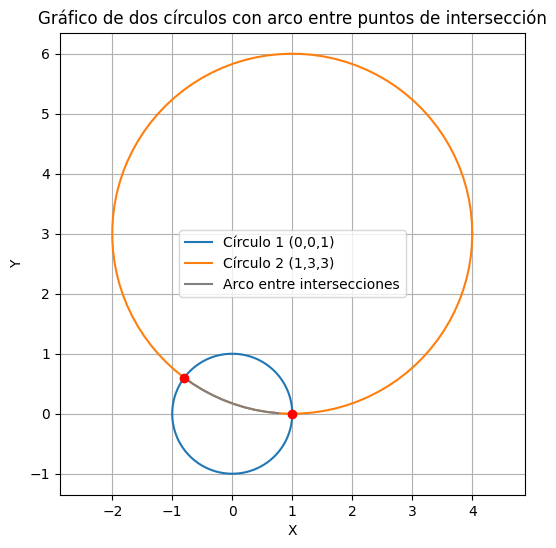

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 3)**2 - (3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,3) y radio 3
r2 = 3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 3 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,3,3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Reparar porque usa complejos

Puntos de intersección como complejos:
(0.8+0j) (-0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
(0.8+0j) (-0.6+0j)
(1+0j) 0j


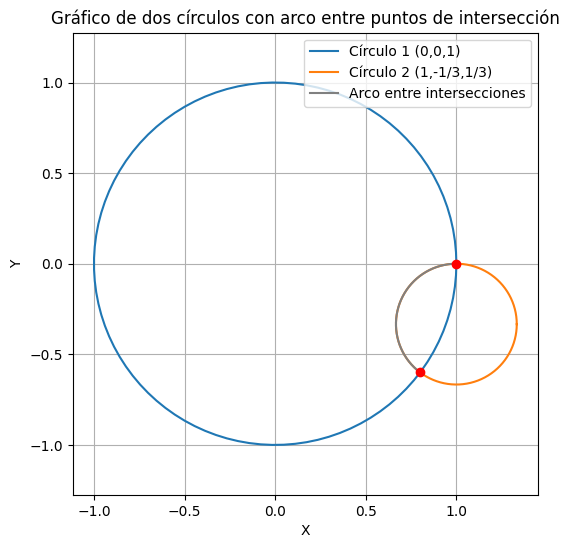

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-1/3))**2 - (-1/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(complex(intersection[0]), complex(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,-1/3) y radio 1/3
r2 = 1/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = (-1/3) + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-1/3,1/3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
0j (-1+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.0 -1.0
1.0 0.0


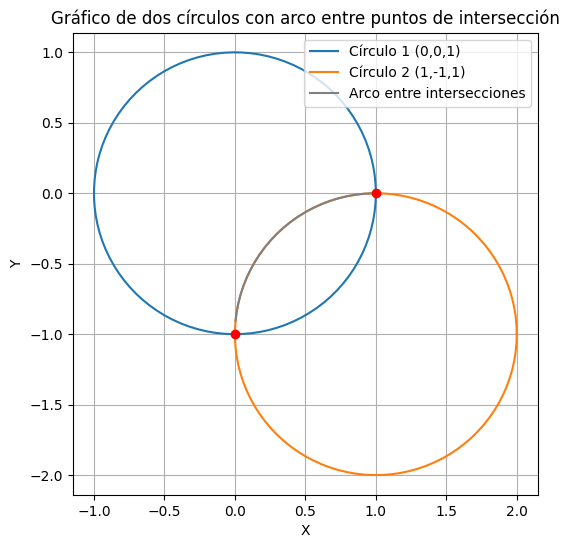

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-1))**2 - (-1)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,-1) y radio -1
r2 = 1
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = -1 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-1,1)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(-0.8+0j) (-0.6+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.8 -0.6
1.0 0.0


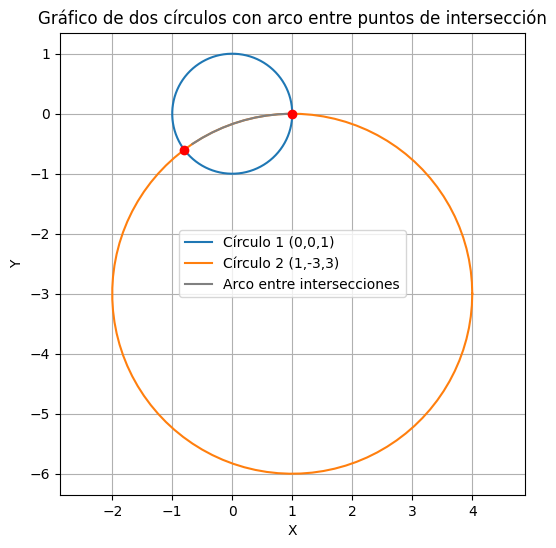

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-3))**2 - (-3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = (-3) + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-3,3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(-0.47058823529411764+0j) (0.8823529411764706+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.47058823529411764 0.8823529411764706
1.0 0.0


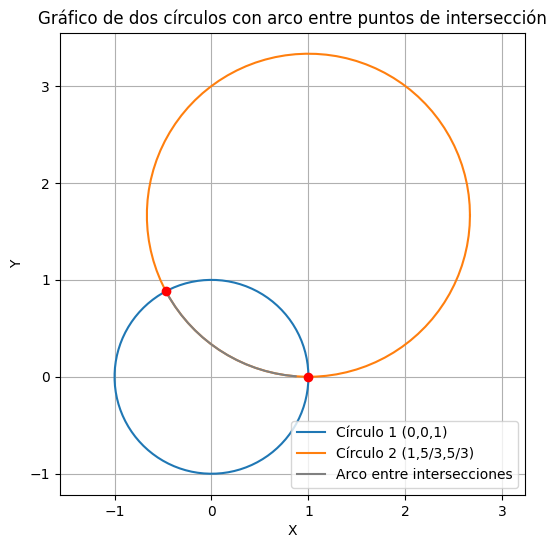

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (5/3))**2 - (5/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 5/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 5/3 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,5/3,5/3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

Puntos de intersección como complejos:
(-0.96+0j) (0.28+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.96 0.28
1.0 0.0


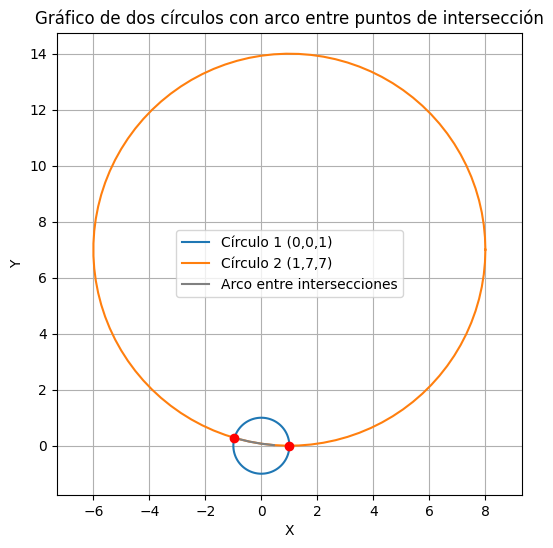

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 7)**2 - (7)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 7
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 7 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,7,7)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección como complejos:
(0.96+0j) (0.28+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.96 0.28
1.0 0.0


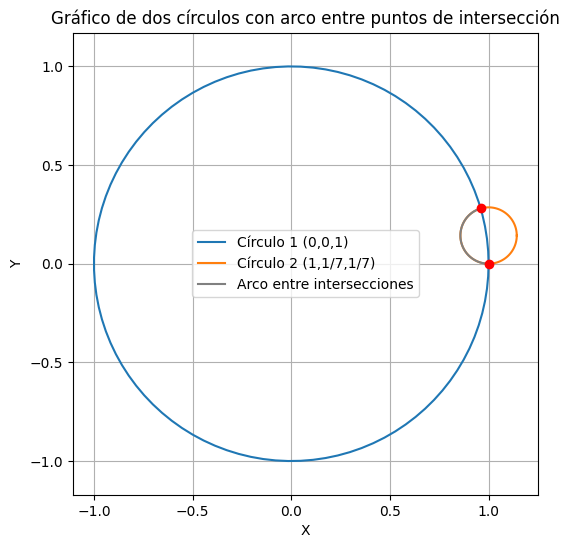

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (1/7))**2 - (1/7)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/7
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1/7 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1/7,1/7)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(-0.47058823529411764+0j) (-0.8823529411764706+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.47058823529411764 -0.8823529411764706
1.0 0.0


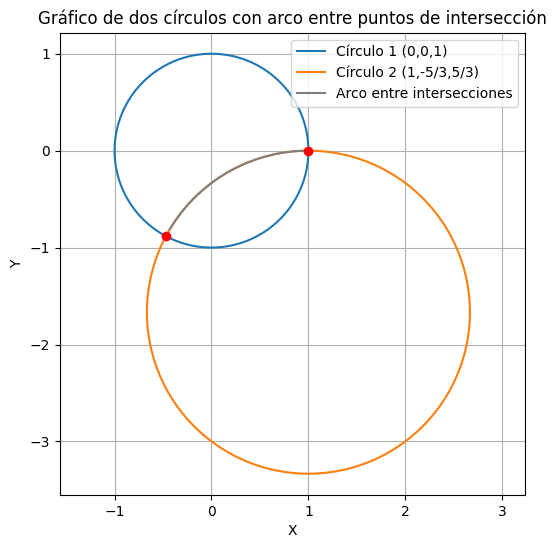

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-5/3))**2 - (-5/3)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,-5/3) y radio 5/3
r2 = 5/3
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = -5/3 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-5/3,5/3)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(-0.96+0j) (-0.28+0j)
(1+0j) 0j
Puntos de intersección como reales:
-0.96 -0.28
1.0 0.0


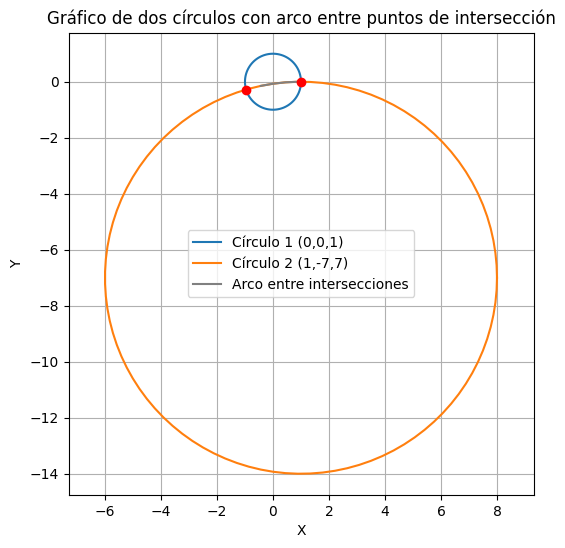

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-7))**2 - (-7)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 7
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = (-7) + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-7,7)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(0.47058823529411764+0j) (-0.8823529411764706+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.47058823529411764 -0.8823529411764706
1.0 0.0


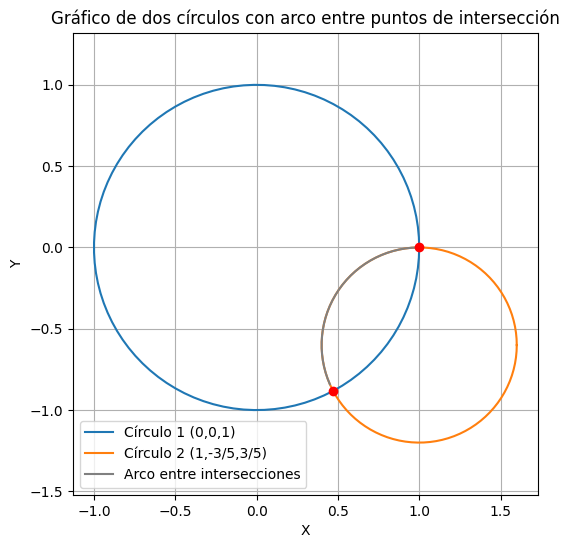

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-3/5))**2 - ((-3/5))**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 3/5
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = (-3/5) + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-3/5,3/5)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(0.96+0j) (-0.28+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.96 -0.28
1.0 0.0


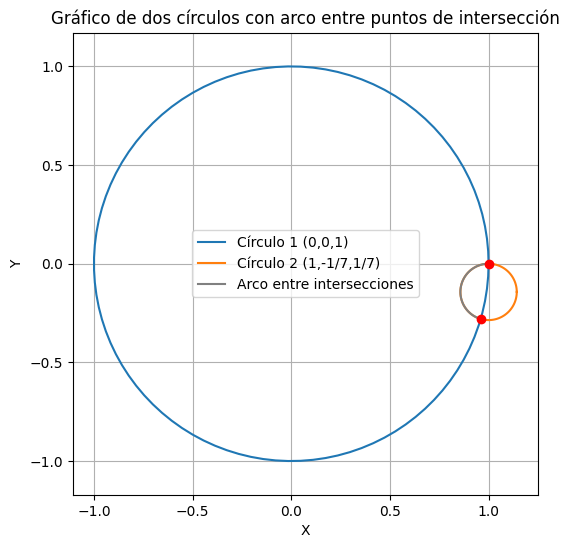

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - (-1/7))**2 - (-1/7)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1/7
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = -1/7 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,-1/7,1/7)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
eq2 = (x - 1)**2 + (y - 1)**2 - (1)**2

# Encontrar puntos de intersección
intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = 1
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = 1 + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1,1)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - (value)**2

    # Encontrar puntos de intersección
    intersections = solve((eq1, eq2), (x, y))

# Extraer coordenadas de los puntos de intersección (como números reales)
intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]

# Imprimir los puntos de intersección como números complejos
print("Puntos de intersección como complejos:")
for intersection in intersections:
    print(complex(intersection[0]), complex(intersection[1]))

print("Puntos de intersección como reales:")
for intersection in intersections:
    print(float(intersection[0]), float(intersection[1]))

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Definir el segundo círculo con centro en (1,1/3) y radio 1/3
r2 = values
theta2 = np.linspace(0, 2*np.pi, 100)
x2 = 1 + r2 * np.cos(theta2)
y2 = values + r2 * np.sin(theta2)

# Extraer las coordenadas x y y de los puntos de intersección
x_intersections = [point[0] for point in intersection_points_real]
y_intersections = [point[1] for point in intersection_points_real]

# Encontrar el índice del punto más cercano al principio del círculo
index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

# Definir el arco del segundo círculo entre los puntos de intersección
x_arc = x2[min(index1, index2): max(index1, index2)]
y_arc = y2[min(index1, index2): max(index1, index2)]

# Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
plt.plot(x2, y2, label='Círculo 2 (1,1,1)')
plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

Puntos de intersección como complejos:
(0.96+0j) (-0.28+0j)
(1+0j) 0j
Puntos de intersección como reales:
0.96 -0.28
1.0 0.0


ValueError: operands could not be broadcast together with shapes (14,) (100,) 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Define values for the radii of the circles
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Define symbolic variables
x, y = symbols('x y')

# Define equation for the fixed circle
eq1 = x**2 + y**2 - 1

# List to store equations for circles with varying radii
eq2_list = []

# Define equations for circles with varying radii
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    eq2_list.append(eq2)

# Find intersection points
intersections = []
for eq2 in eq2_list:
    intersection = solve((eq1, eq2), (x, y))
    intersections.append(intersection)

# Print intersection points for each circle
for i, intersection in enumerate(intersections):
    print(f"Intersection points for circle {i+1}: {intersection}")


Intersection points for circle 1: [(0.800000000000000, 0.600000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 2: [(0.0, 1.00000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 3: [(-0.800000000000000, 0.600000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 4: [(0.800000000000000, -0.600000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 5: [(0.0, -1.00000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 6: [(-0.800000000000000, -0.600000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 7: [(-0.470588235294118, 0.882352941176471), (1.00000000000000, 0.0)]
Intersection points for circle 8: [(-0.960000000000000, 0.280000000000000), (1.00000000000000, 0.0)]
Intersection points for circle 9: [(0.470588235294118, 0.882352941176471), (1.00000000000000, 0.0)]
Intersection points for circle 10: [(0.960000000000000, 0.280000000000000), (1.00000000000000, 0.0)]
Intersection points fo

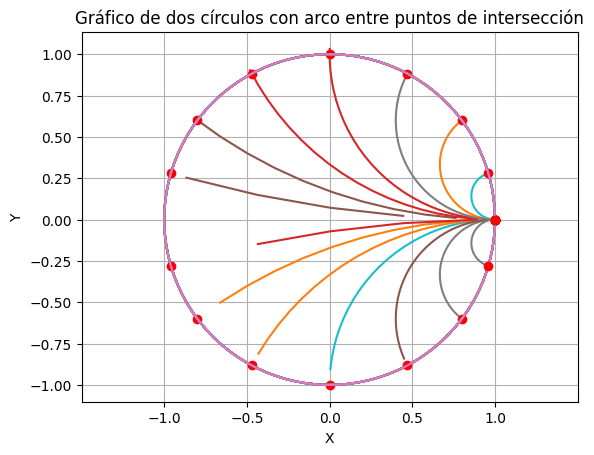

<Figure size 1000x1000 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    intersections = solve((eq1, eq2), (x, y))
    intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
    x_intersections = [point[0] for point in intersection_points_real]
    y_intersections = [point[1] for point in intersection_points_real]
    
    # Imprimir los puntos de intersección
    #print(f"Puntos de intersección para el radio {value}: {intersection_points_real}")

    # Definir el segundo círculo con centro en (1,value) y radio value
    r2 = abs(value)
    theta2 = np.linspace(0, 2*np.pi, 100)
    x2 = 1 + r2 * np.cos(theta2)
    y2 = value + r2 * np.sin(theta2)

    # Encontrar el índice del punto más cercano al principio del círculo
    index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
    index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

    # Definir el arco del segundo círculo entre los puntos de intersección
    x_arc = x2[min(index1, index2): max(index1, index2)]
    y_arc = y2[min(index1, index2): max(index1, index2)]
    
    plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')
    plt.plot(x_arc, y_arc)
    plt.plot(x_intersections, y_intersections, 'ro')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
    plt.axis('equal')
    plt.grid(True)
    #plt.legend()
    # Graficar los círculos y el arco entre los puntos de intersección
plt.figure(figsize=(10,10))
#plt.plot(x1, y1, label='Círculo 1 (0,0,1)')
#plt.plot(x2, y2, label=f'Círculo 2 (1,{value},{abs(value)})')
#plt.plot(x_arc, y_arc, color='gray', label='Arco entre intersecciones')
#plt.plot(x_intersections, y_intersections, 'ro')  # Pintar puntos de intersección en rojo
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
#plt.axis('equal')
#plt.grid(True)
#plt.legend()
plt.show()


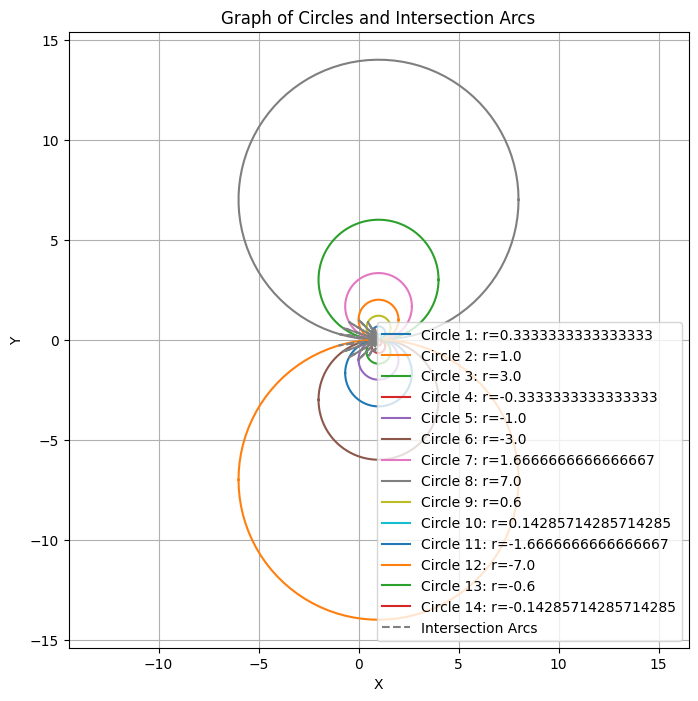

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Define symbolic variables
x, y = symbols('x y')

# Define the equation for the fixed circle
eq1 = x**2 + y**2 - 1

# Array of values for the radii of the circles
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Initialize lists to store circle data
circle_x = []
circle_y = []

# Initialize lists to store arc data
arc_x = []
arc_y = []

# Iterate over the values and find intersection points and arcs
for value in values:
    # Define the equation for the current circle
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    
    # Find intersection points
    intersections = solve((eq1, eq2), (x, y))
    
    # Extract real intersection points
    intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
    
    # Store intersection points
    for point in intersection_points_real:
        arc_x.append(point[0])
        arc_y.append(point[1])
    
    # Define circle coordinates
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x.append(1 + value * np.cos(theta))
    circle_y.append(value + value * np.sin(theta))

# Plot circles and arcs
plt.figure(figsize=(8, 8))
for i in range(len(values)):
    plt.plot(circle_x[i], circle_y[i], label=f'Circle {i+1}: r={values[i]}')
plt.plot(arc_x, arc_y, color='gray', label='Intersection Arcs', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph of Circles and Intersection Arcs')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Puntos de intersección para el radio 0.3333333333333333: [(0.8, 0.6), (1.0, 0.0)]
Puntos de intersección para el radio 1.0: [(0.0, 1.0), (1.0, 0.0)]
Puntos de intersección para el radio 3.0: [(-0.8, 0.6), (1.0, 0.0)]
Puntos de intersección para el radio -0.3333333333333333: [(0.8, -0.6), (1.0, 0.0)]
Puntos de intersección para el radio -1.0: [(0.0, -1.0), (1.0, 0.0)]
Puntos de intersección para el radio -3.0: [(-0.8, -0.6), (1.0, 0.0)]
Puntos de intersección para el radio 1.6666666666666667: [(-0.47058823529411764, 0.8823529411764706), (1.0, 0.0)]
Puntos de intersección para el radio 7.0: [(-0.96, 0.28), (1.0, 0.0)]
Puntos de intersección para el radio 0.6: [(0.47058823529411764, 0.8823529411764706), (1.0, 0.0)]
Puntos de intersección para el radio 0.14285714285714285: [(0.96, 0.28), (1.0, 0.0)]
Puntos de intersección para el radio -1.6666666666666667: [(-0.47058823529411764, -0.8823529411764706), (1.0, 0.0)]
Puntos de intersección para el radio -7.0: [(-0.96, -0.28), (1.0, 0.0)]
Punto

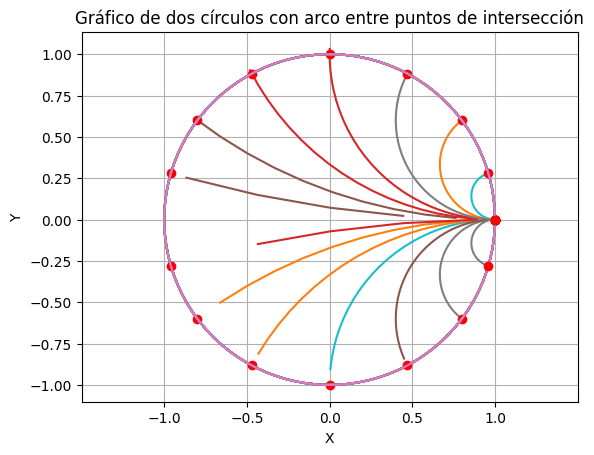

<Figure size 1000x1000 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    intersections = solve((eq1, eq2), (x, y))
    intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
    x_intersections = [point[0] for point in intersection_points_real]
    y_intersections = [point[1] for point in intersection_points_real]
    
    # Imprimir los puntos de intersección
    print(f"Puntos de intersección para el radio {value}: {intersection_points_real}")

    # Definir el segundo círculo con centro en (1,value) y radio value
    r2 = np.abs(value)
    theta2 = np.linspace(0, 2*np.pi, 100)
    x2 = 1 + r2 * np.cos(theta2)
    y2 = value + r2 * np.sin(theta2)

    # Encontrar el índice del punto más cercano al principio del círculo
    index1 = np.argmin(np.sqrt((x2 - x_intersections[0])**2 + (y2 - y_intersections[0])**2))
    index2 = np.argmin(np.sqrt((x2 - x_intersections[1])**2 + (y2 - y_intersections[1])**2))

    # Definir el arco del segundo círculo entre los puntos de intersección
    x_arc = x2[min(index1, index2): max(index1, index2)]
    y_arc = y2[min(index1, index2): max(index1, index2)]
    
    plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')
    plt.plot(x_arc, y_arc)
    plt.plot(x_intersections, y_intersections, 'ro')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
    plt.axis('equal')
    plt.grid(True)
    #plt.legend()

plt.figure(figsize=(10,10))
plt.show()


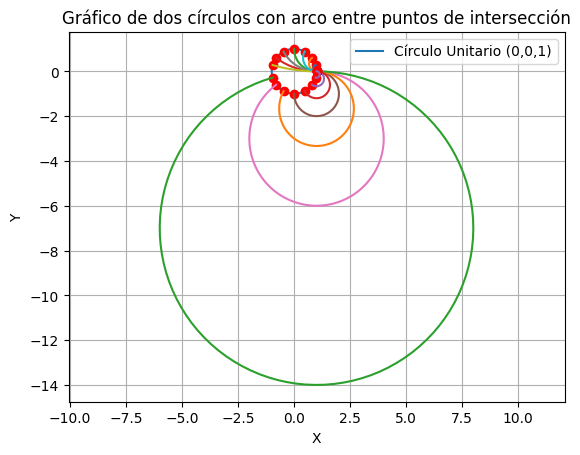

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points_real = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        x_intersections = [point[0] for point in intersection_points_real]
        y_intersections = [point[1] for point in intersection_points_real]

        # Graficar puntos de intersección
        plt.plot(x_intersections, y_intersections, 'ro')

        # Graficar arco entre puntos de intersección
        if len(intersection_points_real) == 2:
            theta2 = np.arctan2(y_intersections[1] - value, x_intersections[1] - 1)
            theta1 = np.arctan2(y_intersections[0] - value, x_intersections[0] - 1)
            if theta2 < theta1:
                theta2 += 2*np.pi
            theta = np.linspace(theta1, theta2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc)
    except:
        pass

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


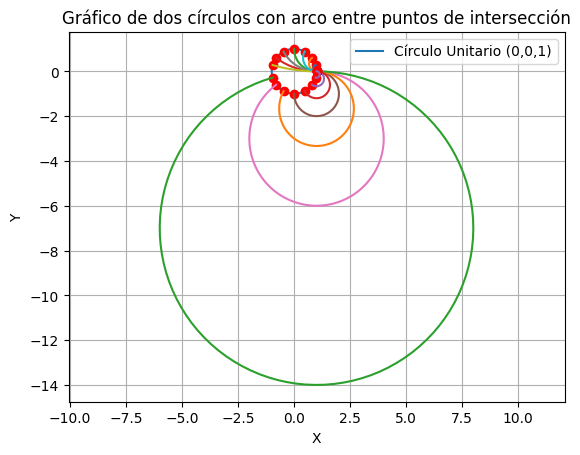

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones reales para el radio {value}.")
            continue
        
        x_intersections = [point[0] for point in intersection_points]
        y_intersections = [point[1] for point in intersection_points]

        # Graficar puntos de intersección
        plt.plot(x_intersections, y_intersections, 'ro')

        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            theta2 = np.arctan2(y_intersections[1] - value, x_intersections[1] - 1)
            theta1 = np.arctan2(y_intersections[0] - value, x_intersections[0] - 1)
            if theta2 < theta1:
                theta2 += 2*np.pi
            theta = np.linspace(theta1, theta2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc)
    except:
        print(f"No se pudieron calcular las soluciones para el radio {value}.")
        pass

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


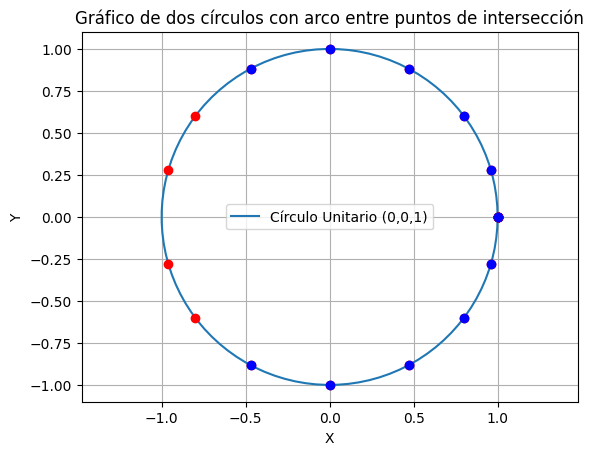

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección
        plt.plot(x_intersections_real, y_intersections_real, 'ro')

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            imag_part = y_inter - value
            if abs(imag_part) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'bo')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()



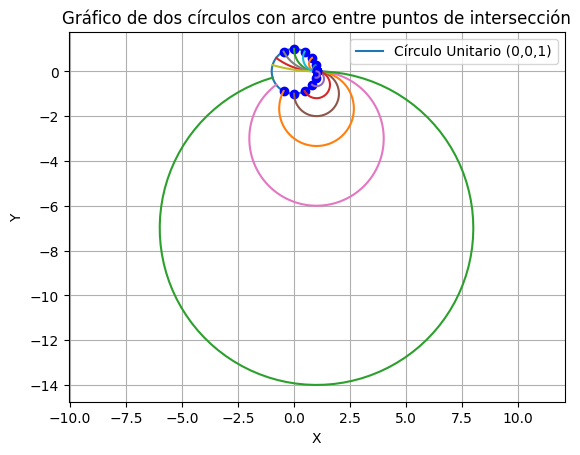

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            imag_part = y_inter - value
            if abs(imag_part) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'bo')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario
        
        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            theta2 = np.arctan2(y_intersections_real[1] - value, x_intersections_real[1] - 1)
            theta1 = np.arctan2(y_intersections_real[0] - value, x_intersections_real[0] - 1)
            if theta2 < theta1:
                theta2 += 2*np.pi
            theta = np.linspace(theta1, theta2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc)
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


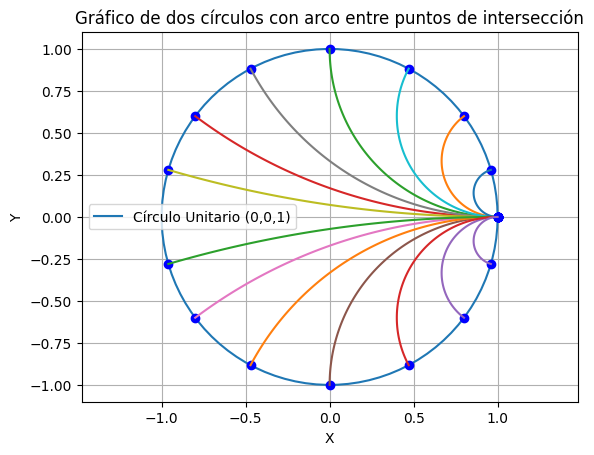

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            if abs(y_inter) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'bo')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario
        
        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            # Calcular ángulos de inicio y fin para trazar el arco
            angle1 = np.arctan2(y_intersections_real[0] - value, x_intersections_real[0] - 1)
            angle2 = np.arctan2(y_intersections_real[1] - value, x_intersections_real[1] - 1)
            # Ajustar los ángulos para que estén en el rango [0, 2*pi]
            if angle1 < 0:
                angle1 += 2*np.pi
            if angle2 < 0:
                angle2 += 2*np.pi
            # Asegurarse de que el ángulo 2 sea mayor que el ángulo 1
            #if angle2 > angle1:
             #   angle2 += 2*np.pi
            theta = np.linspace(angle1, angle2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc)
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


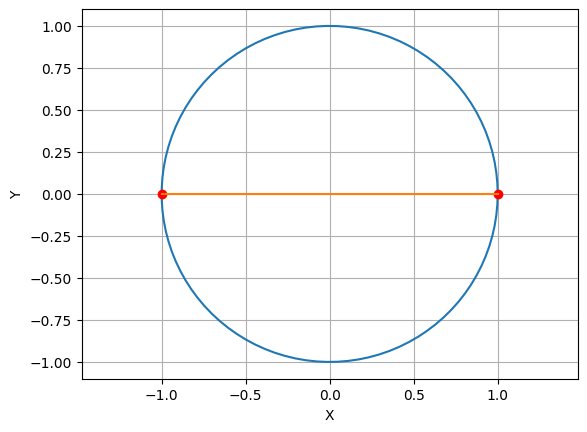

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Definir el primer círculo con centro en el origen y radio 1
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

# Graficar el círculo unitario
plt.plot(x_circle, y_circle, label='Círculo Unitario (0,0,1)')

# Graficar la línea y=0
#plt.axhline(0, color='black', linestyle='--', label='y=0')

# Calcular intersección con la línea y=0
x_inter = np.sqrt(1)
y_inter = 0

# Graficar los puntos de intersección
plt.plot([x_inter, -x_inter], [y_inter, y_inter], 'ro')
#plt.text(x_inter, 0.05, f'({x_inter:.2f}, 0)', fontsize=8, ha='left')
#plt.text(-x_inter, 0.05, f'({-x_inter:.2f}, 0)', fontsize=8, ha='right')

# Graficar la línea punteada entre los puntos de intersección
plt.plot([x_inter, -x_inter], [y_inter, y_inter])

plt.xlabel('X')
plt.ylabel('Y')
#plt.title('Círculo Unitario con y=0 y sus puntos de intersección')
plt.axis('equal')
plt.grid(True)
#plt.legend()
plt.show()


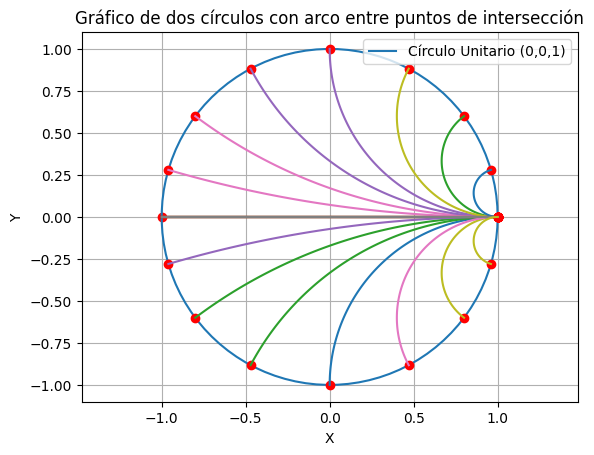

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Calcular intersección con la línea y=0
x_0 = np.sqrt(1)
y_0 = 0

# Graficar los puntos de intersección
plt.plot([x_0, -x_0], [y_0, y_0], 'ro')

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            if abs(y_inter) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'ro')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario

        # Graficar la línea y=0 entre los puntos de intersección
        plt.plot([x_0, -x_0], [y_0, y_0])
        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            # Calcular ángulos de inicio y fin para trazar el arco
            angle1 = np.arctan2(y_intersections_real[0] - value, x_intersections_real[0] - 1)
            angle2 = np.arctan2(y_intersections_real[1] - value, x_intersections_real[1] - 1)
            # Ajustar los ángulos para que estén en el rango [0, 2*pi]
            if angle1 < 0:
                angle1 += 2*np.pi
            if angle2 < 0:
                angle2 += 2*np.pi
            theta = np.linspace(angle1, angle2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc)
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dos círculos con arco entre puntos de intersección')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de valores
values = [0, 1/3, 1, 3, 5/3, 7, 3/5, 1/7]

# Definir la ecuación
def circle_equation(x, y, val):
    return (x - val / (val + 1)) ** 2 + y ** 2 - 1 / (val + 1) ** 2

# Crear una cuadrícula de valores para x e y
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

# Graficar cada círculo individualmente
plt.figure(figsize=(8, 6))
for val in values:
    Z = circle_equation(X, Y, val)
    color = np.random.rand(3,)  # Genera un color aleatorio RGB
    plt.contour(X, Y, Z, levels=[0], colors=[color])  # Usa el color aleatorio
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de las ecuaciones de los círculos')
plt.grid(True)
plt.show()

# Finalmente, salió, Gráfica de Smith completa

## Primer Ecuación:
$$\left(x-\frac{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]}{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1}\right)^{2}+y^{2}=\frac{1}{\left(\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1\right)^{2}}$$

## Segunda Ecuación:
$$\left(x-1\right)^{2}+\left(y-\frac{1}{\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]}\right)^{2}=\frac{1}{\left(\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]\right)^{2}}\left\{x^{2}+y^{2}\le1\right\}$$

## Tercer Ecuación:
$$y=0\left\{x^{2}+y^{2}\le1\right\}$$

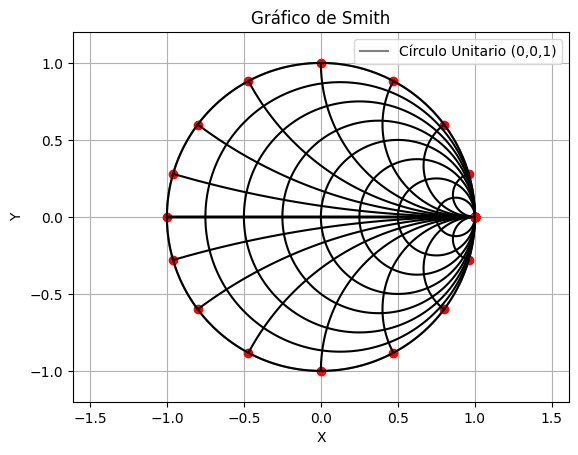

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve


# Lista de valores
valores = [0, 1/3, 1, 3, 5/3, 7, 3/5, 1/7]

# Definir la ecuación
def circle_equation(x, y, valores):
    return (x - valores / (valores + 1)) ** 2 + y ** 2 - 1 / (valores + 1) ** 2

# Crear una cuadrícula de valores para x e y
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Calcular intersección con la línea y=0
x_0 = np.sqrt(1)
y_0 = 0

# Graficar los puntos de intersección
plt.plot([x_0, -x_0], [y_0, y_0], 'ro')

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)',color='gray')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            if abs(y_inter) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'ro')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario

        # Graficar la línea y=0 entre los puntos de intersección
        plt.plot([x_0, -x_0], [y_0, y_0],'k')
        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            # Calcular ángulos de inicio y fin para trazar el arco
            angle1 = np.arctan2(y_intersections_real[0] - value, x_intersections_real[0] - 1)
            angle2 = np.arctan2(y_intersections_real[1] - value, x_intersections_real[1] - 1)
            # Ajustar los ángulos para que estén en el rango [0, 2*pi]
            if angle1 < 0:
                angle1 += 2*np.pi
            if angle2 < 0:
                angle2 += 2*np.pi
            theta = np.linspace(angle1, angle2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc,'k')
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")

# Graficar cada círculo individualmente
#plt.figure(figsize=(8, 8))
for valor in valores:
    Z = circle_equation(X, Y, valor)
    color = np.random.rand(3,)  # Genera un color aleatorio RGB
    #plt.contour(X, Y, Z, levels=[0], colors=[color])  # Usa el color aleatorio
    plt.contour(X, Y, Z, levels=[0],colors='k')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Smith')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()